In [1]:
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
os.chdir(r"C:\Users\USER\Desktop\ETo data")
data = read_csv('Middle_ogun.csv', header = 6, names = ['Date', 'Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation', 'ETo'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data['Sunlight hours']
data.head(7)




Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01      21.8      33.4        1.08        9.933889         16.96896   
1979-02-01      21.5      34.8        1.64        9.655278         16.79616   
1979-03-01      23.0      34.8        2.01        9.742500         17.91072   
1979-04-01      22.8      33.3        2.31        9.588889         17.11584   
1979-05-01      21.9      31.2        1.57        9.884722         18.86112   
1979-06-01      21.2      29.0        1.74        8.739167         13.91040   
1979-07-01      20.9      28.0        1.72        7.903056         11.59488   

             ETo  
Date              
1979-01-01  3.97  
1979-02-01  4.61  
1979-03-01  5.04  
1979-04-01  4.90  
1979-05-01  4.49  
1979-06-01  3.58  
1979-07-01  3.14

### Checking for missing values

In [2]:
print(data.isnull())
print(data.isnull().any())

            Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01     False     False       False           False            False   
1979-02-01     False     False       False           False            False   
1979-03-01     False     False       False           False            False   
1979-04-01     False     False       False           False            False   
1979-05-01     False     False       False           False            False   
...              ...       ...         ...             ...              ...   
2016-10-01     False     False       False           False            False   
2016-11-01     False     False       False           False            False   
2016-12-01     False     False       False           False            False   
2017-01-01     False     False       False           False            False   
2017-02-01     False     False       False          

### Importing the necessary libraries

In [3]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Plotting the variables for analysis

array([[<AxesSubplot:title={'center':'Temp min'}>,
        <AxesSubplot:title={'center':'Temp max'}>],
       [<AxesSubplot:title={'center':'Wind speed'}>,
        <AxesSubplot:title={'center':'Sunlight hours'}>],
       [<AxesSubplot:title={'center':'Solar Radiation'}>,
        <AxesSubplot:title={'center':'ETo'}>]], dtype=object)

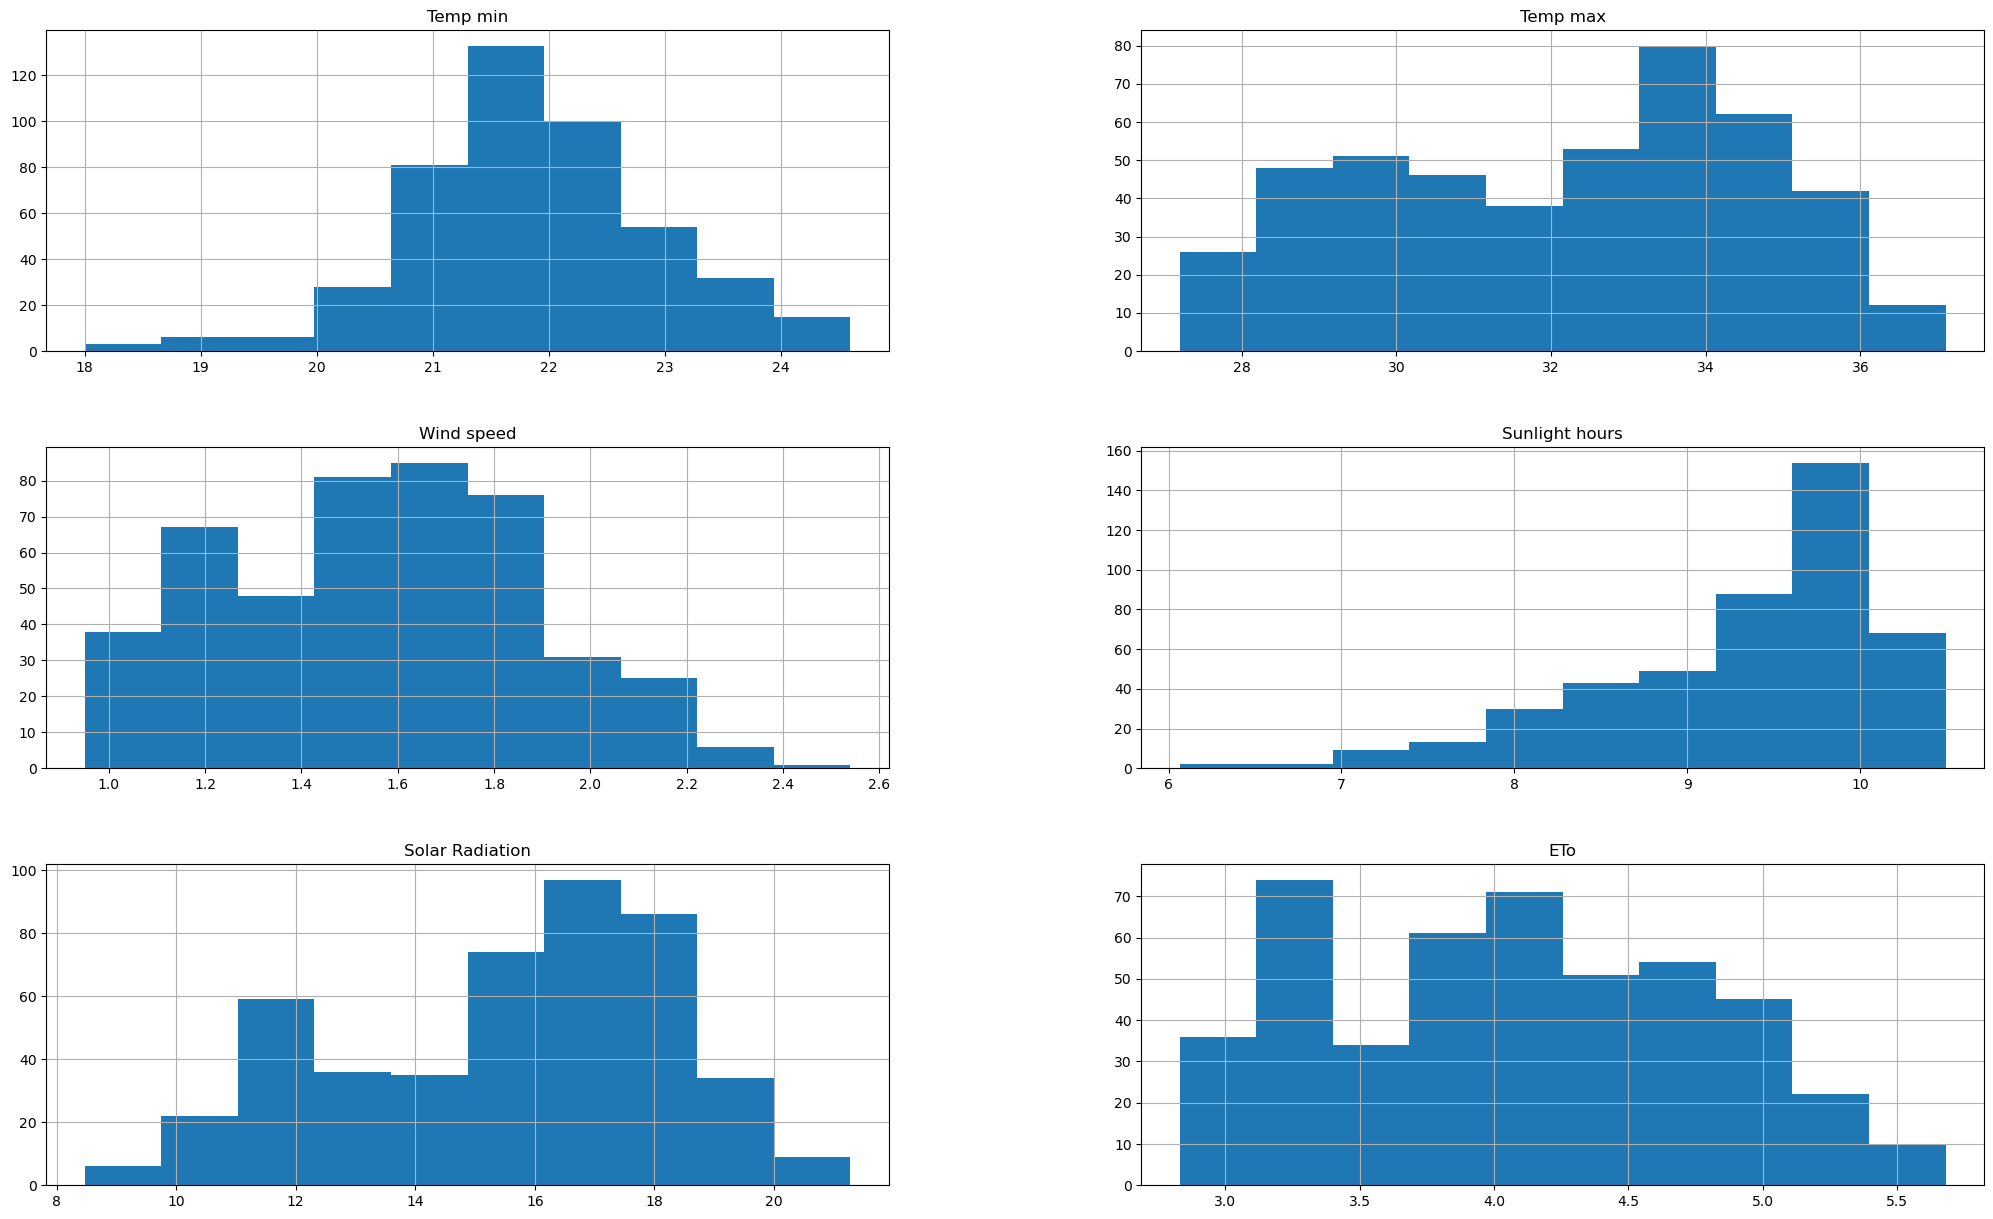

In [4]:
data.hist(figsize=(25,15))

<AxesSubplot:>

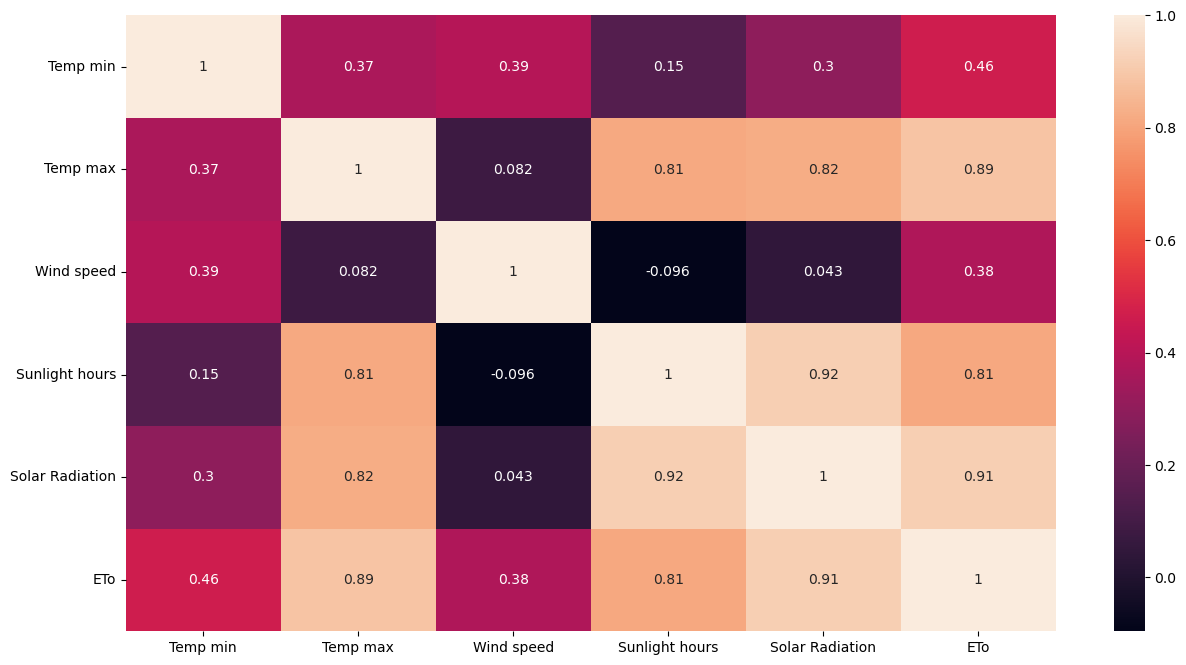

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="rocket")

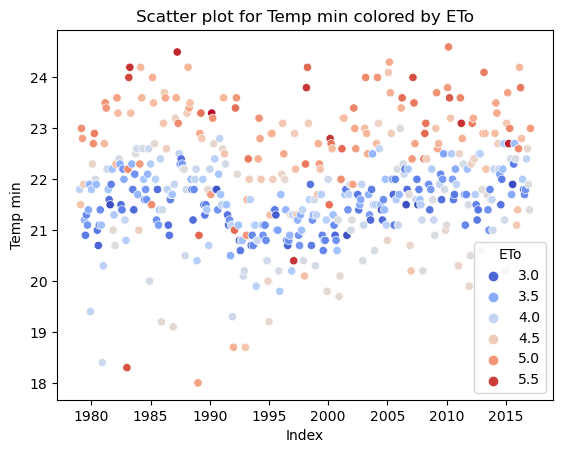

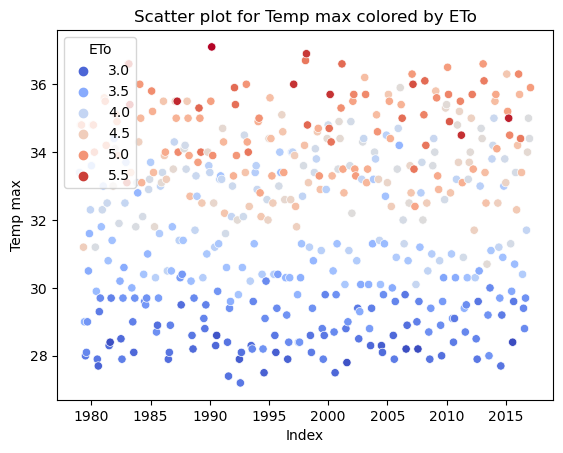

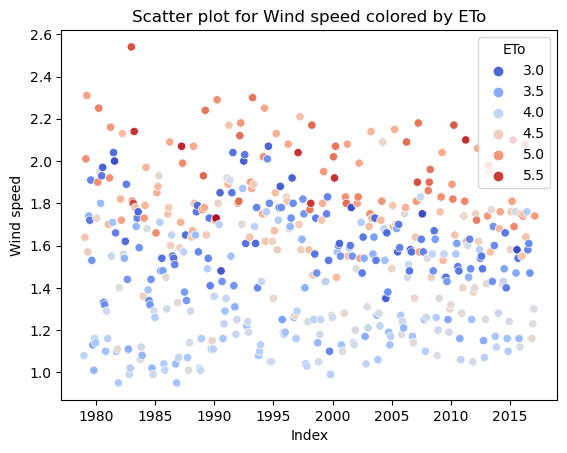

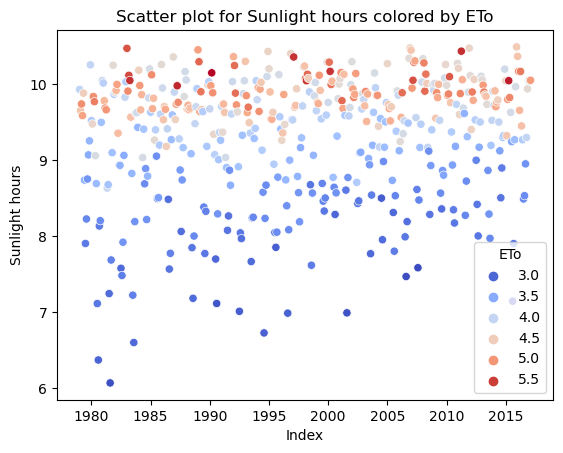

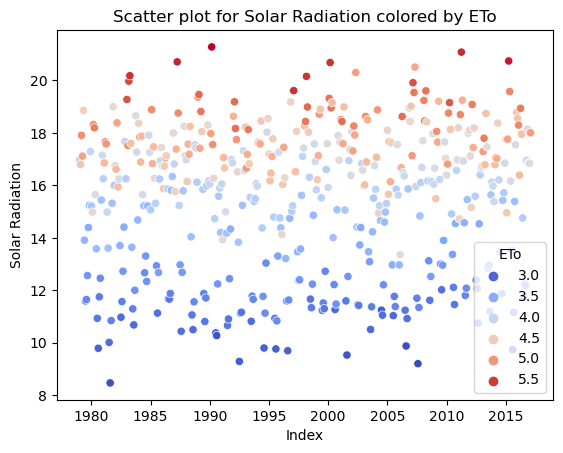

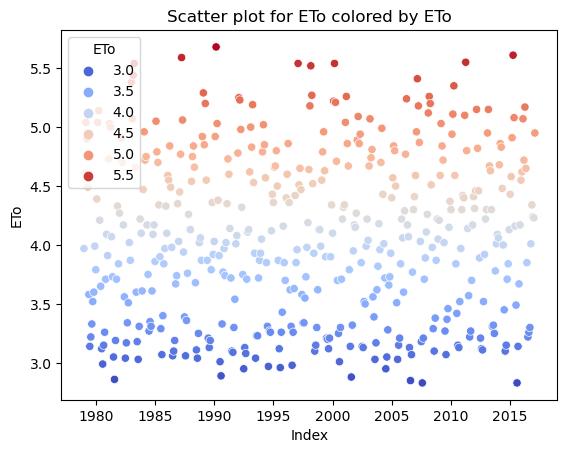

In [6]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'Date']

for feature in numerical_columns:
    sns.scatterplot(x=data.index, y=data[feature], hue=data['ETo'], palette='coolwarm')
    plt.title(f'Scatter plot for {feature} colored by ETo')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

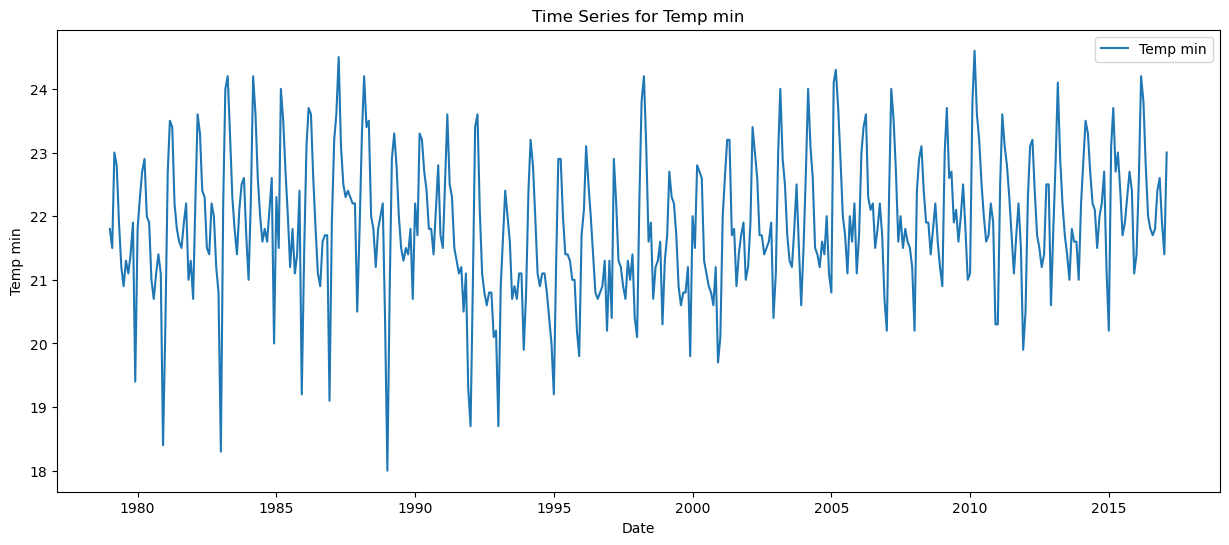

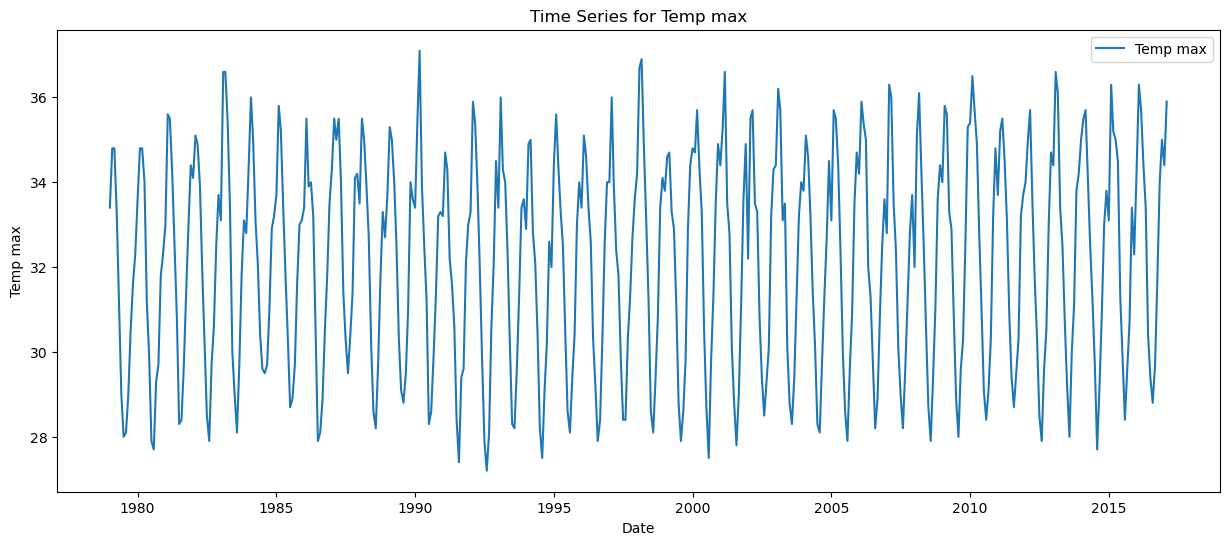

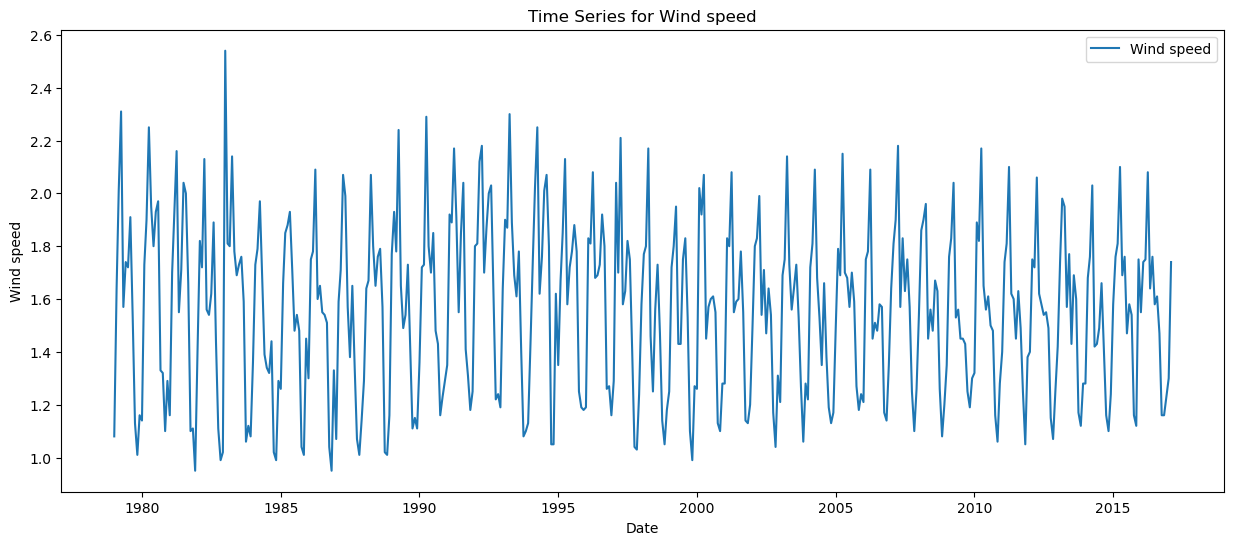

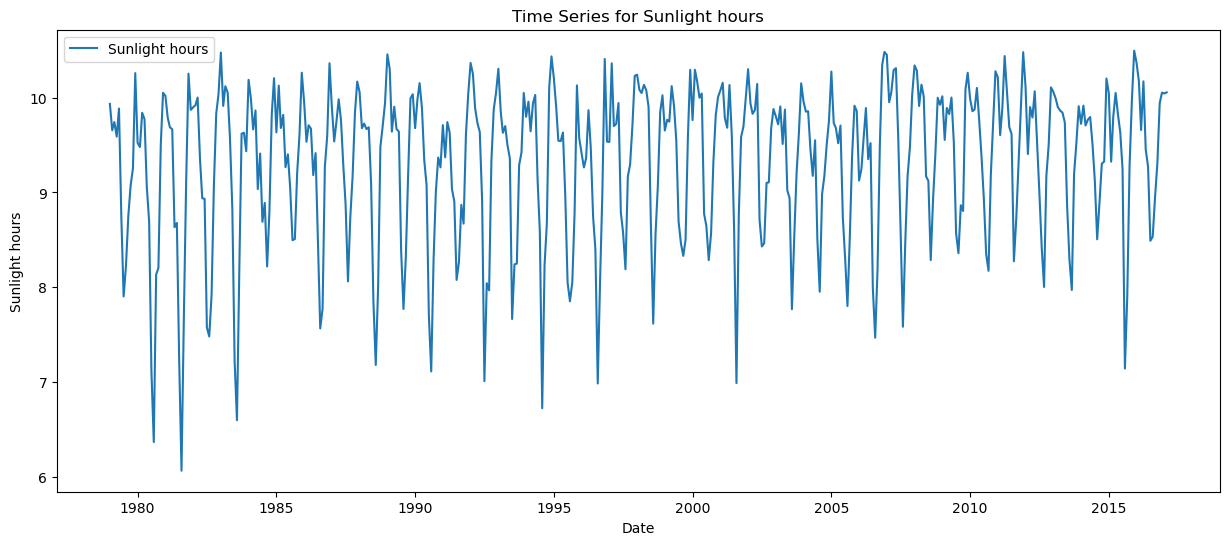

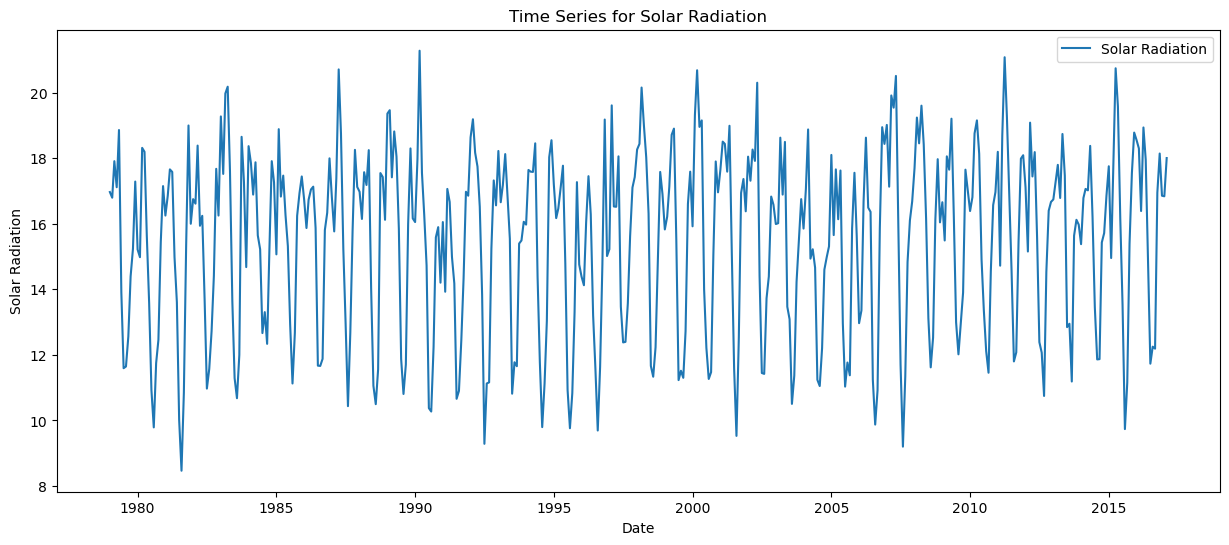

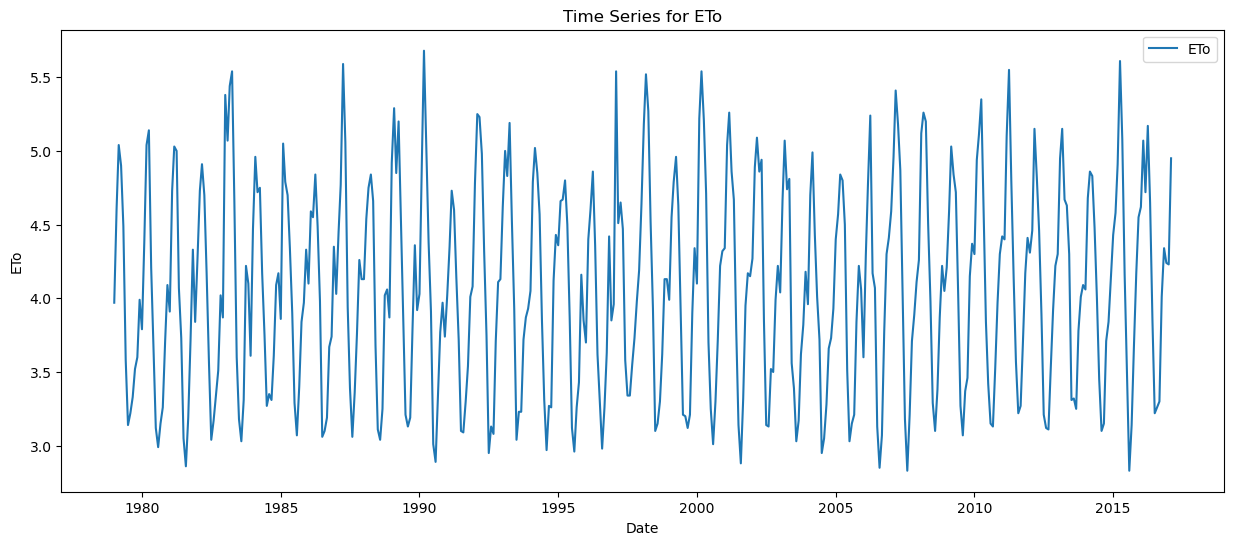

In [7]:
#Time series plot
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'date']
for feature in numerical_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [8]:
#Setting the input features and target variable

x = data[['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (274, 5)
the shape of the training set (target) is: (274,)

the shape of the cross validation set (input) is: (92, 5)
the shape of the cross validation set (target) is: (92,)

the shape of the test set (input) is: (92, 5)
the shape of the test set (target) is: (92,)


In [9]:
import Utils
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


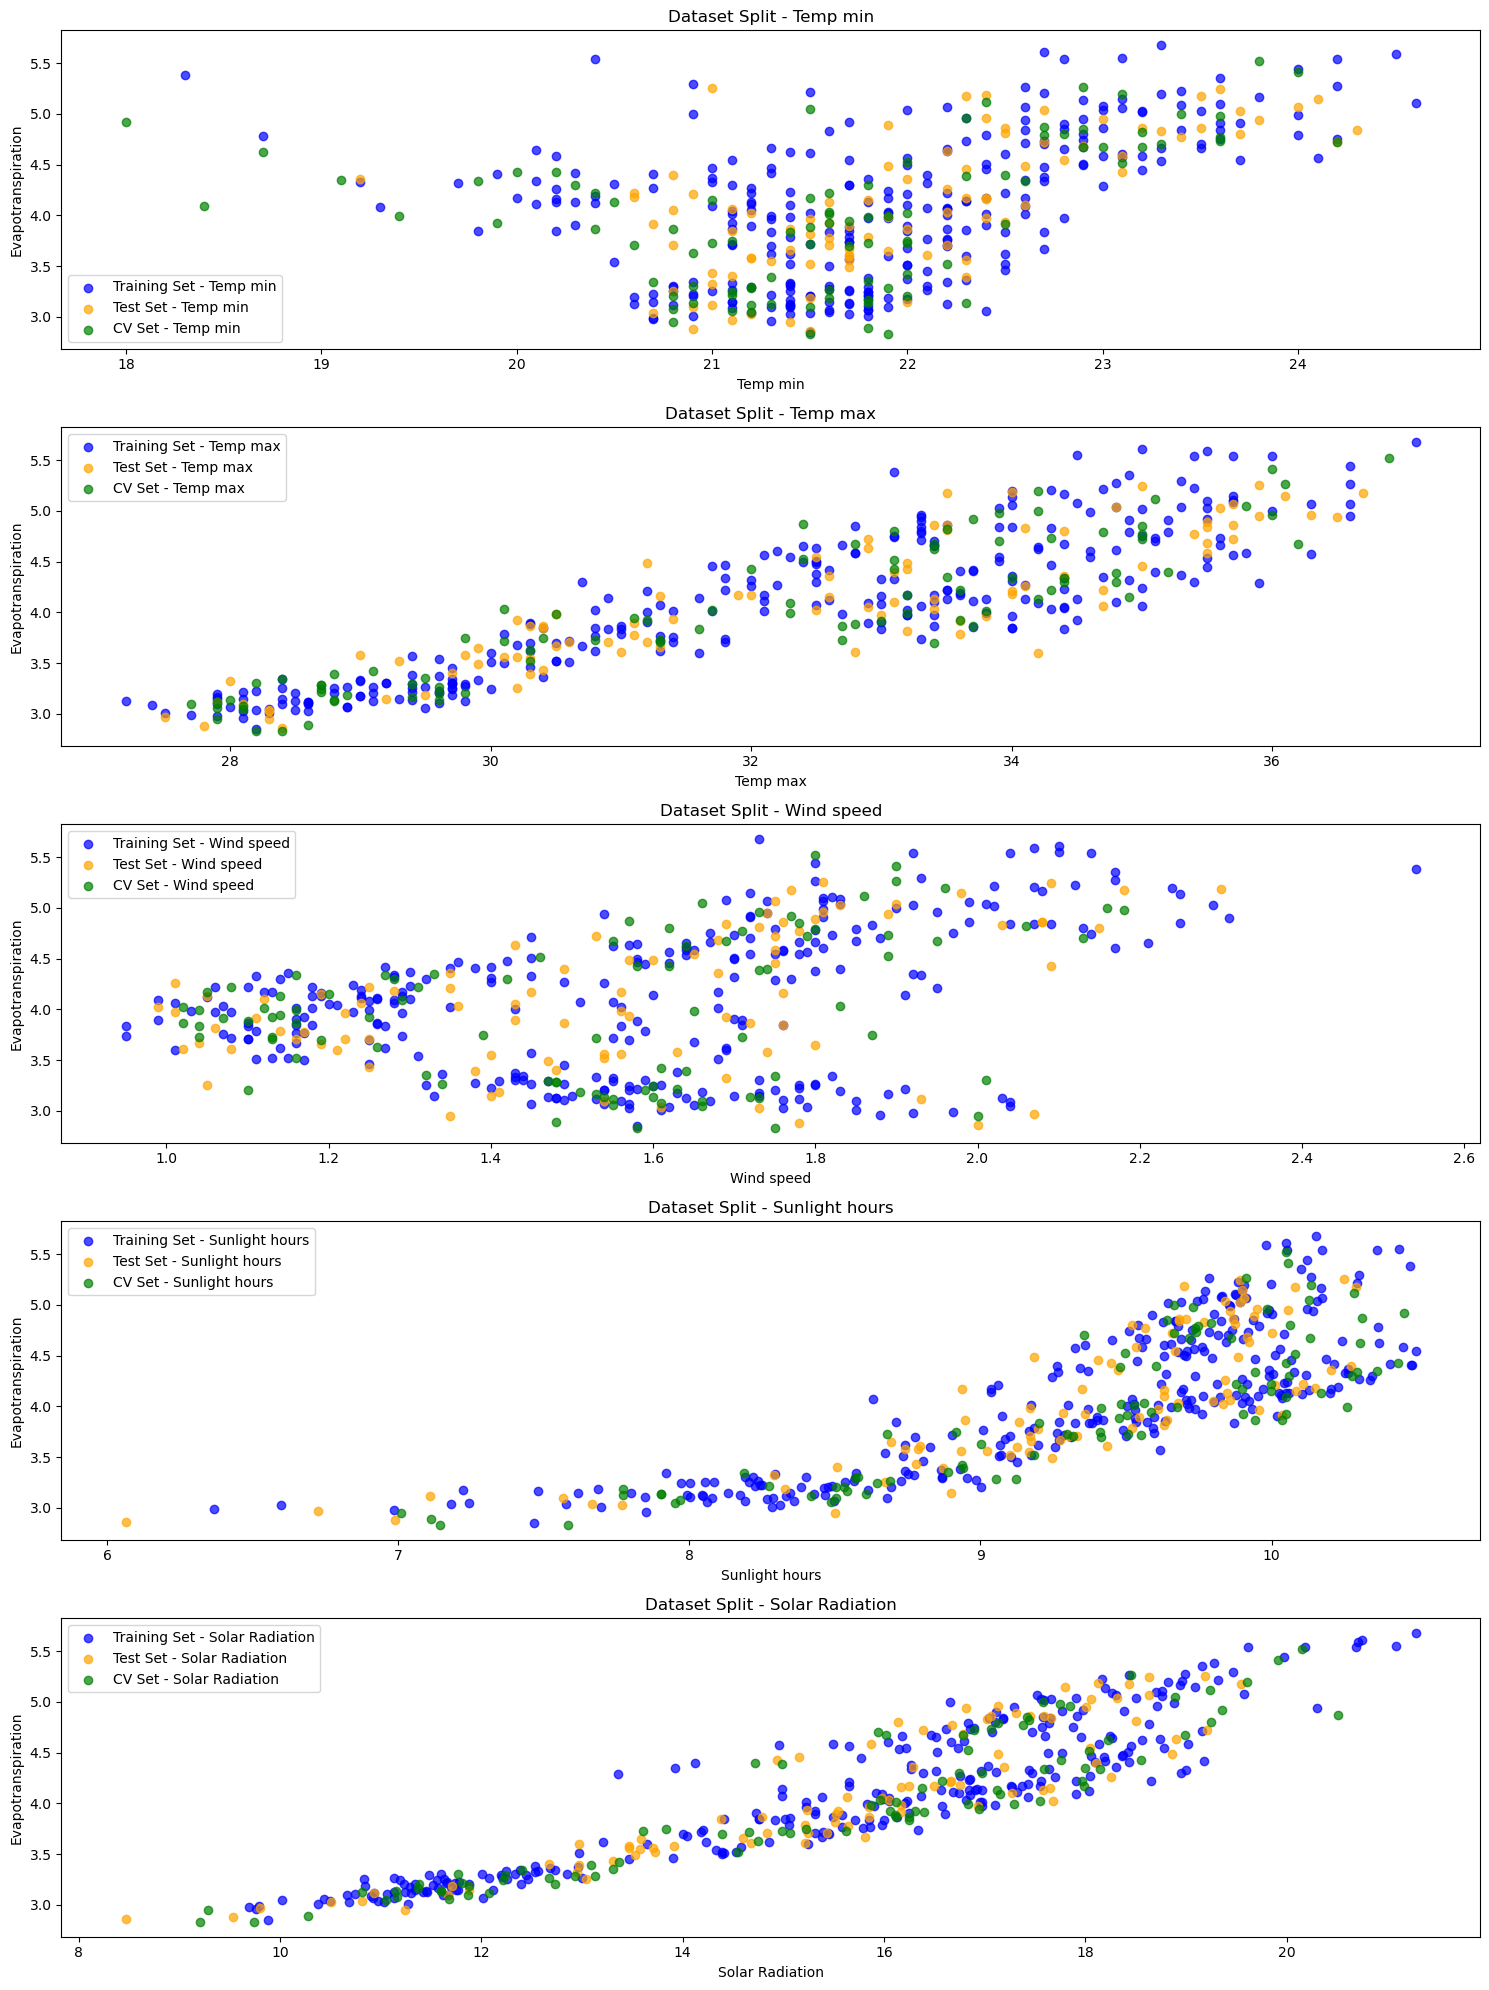

In [10]:
import numpy as np
from Utils import plot_dataset_split

features = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation'] 
plot_dataset_split(x_train, x_test, x_cv, y_train, y_test, y_cv, features)

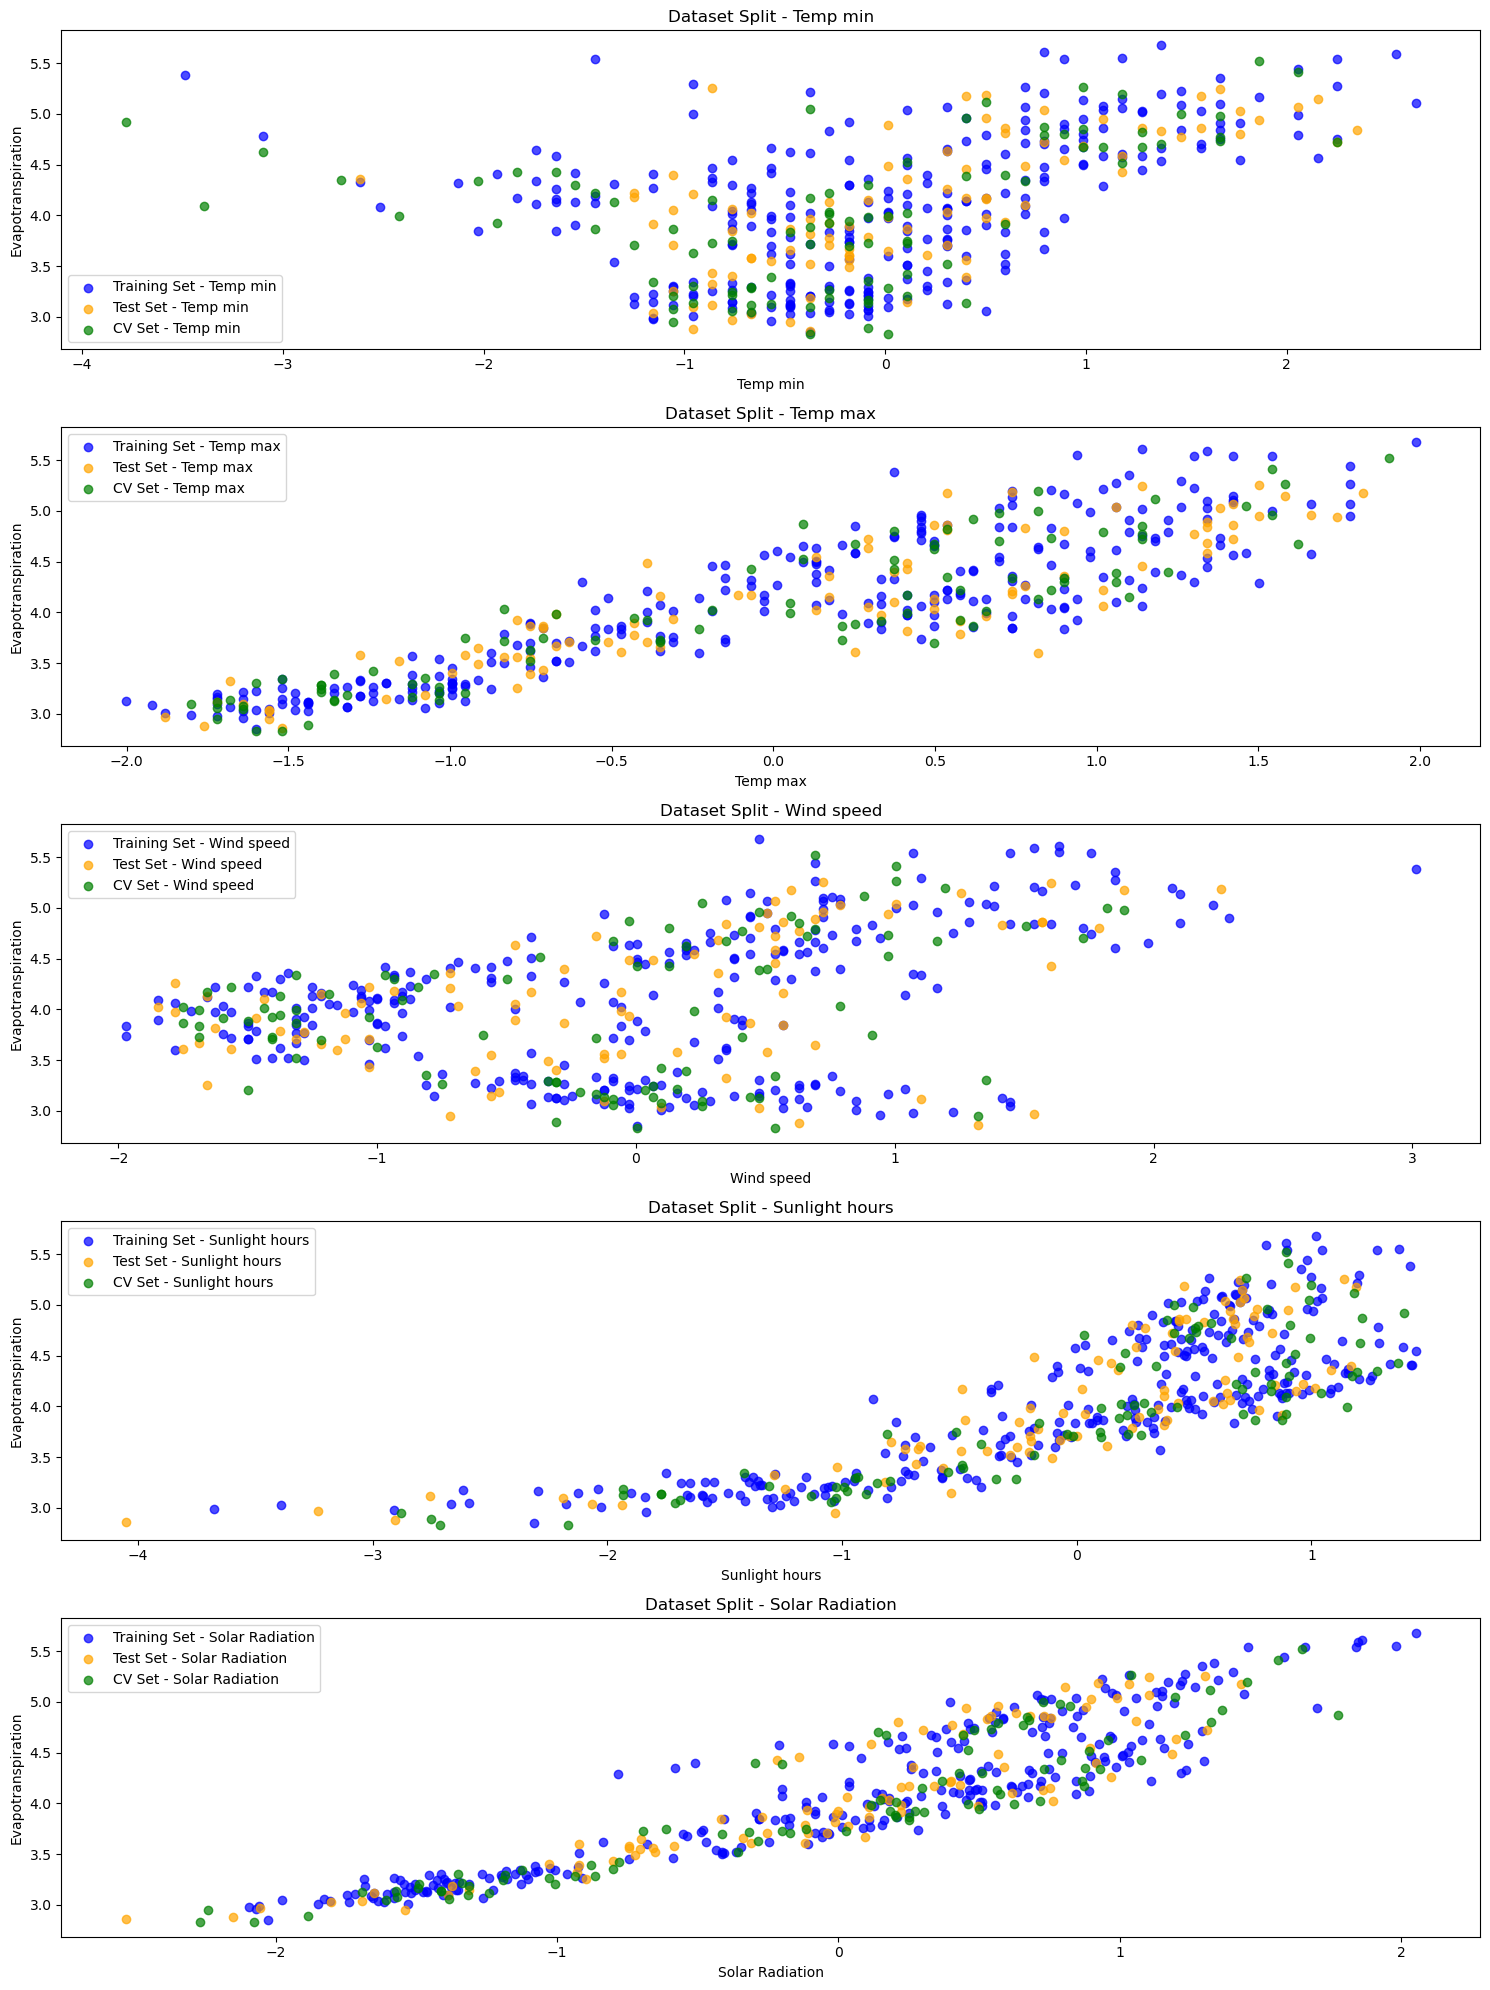

In [11]:
#Scaling the input features

np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
plot_dataset_split(x_train_scaled, x_test_scaled, x_cv_scaled, y_train, y_test, y_cv, features)

### Neural Network Training
### Model 1: All input features

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled, y_train,
    epochs=150
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/150
9/9 [==============================] - 2s 5ms/step - loss: 13.2614 - mae: 3.5255
Epoch 2/150
9/9 [==============================] - 0s 5ms/step - loss: 12.3485 - mae: 3.3797
Epoch 3/150
9/9 [==============================] - 0s 7ms/step - loss: 11.5095 - mae: 3.2382
Epoch 4/150
9/9 [==============================] - 0s 5ms/step - loss: 10.7158 - mae: 3.1026
Epoch 5/150
9/9 [==============================] - 0s 5ms/step - loss: 9.9630 - mae: 2.9734
Epoch 6/150
9/9 [==============================] - 0s 5ms/step - loss: 9.2687 - mae: 2.8513
Epoch 7/150
9/9 [==============================] - 0s 6ms/step - loss: 8.5933 - mae: 2.7341
Epoch 8/150
9/9 [==============================] - 0s 4ms/step - loss: 7.9570 - mae: 2.6208
Epoch 9/150
9/9 [==============================] - 0s 6ms/step - loss: 7.3421 - mae: 2.5109
Epoch 10/150
9/9 [==============================] - 0s 6ms/step - loss: 6.7503 - mae: 2.3989
Epoch 11/150
9/9 [==============================] - 0s 5ms/step - loss: 6.1

9/9 [==============================] - 0s 4ms/step - loss: 0.2276 - mae: 0.3670
Epoch 90/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2237 - mae: 0.3642
Epoch 91/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2200 - mae: 0.3611
Epoch 92/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2162 - mae: 0.3580
Epoch 93/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2121 - mae: 0.3550
Epoch 94/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2086 - mae: 0.3524
Epoch 95/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2051 - mae: 0.3500
Epoch 96/150
9/9 [==============================] - 0s 8ms/step - loss: 0.2014 - mae: 0.3473
Epoch 97/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1979 - mae: 0.3447
Epoch 98/150
9/9 [==============================] - 0s 3ms/step - loss: 0.1948 - mae: 0.3422
Epoch 99/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1915 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.2528 - mae: 0.3144
Epoch 115/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2493 - mae: 0.3113
Epoch 116/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2459 - mae: 0.3085
Epoch 117/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2420 - mae: 0.3053
Epoch 118/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2387 - mae: 0.3023
Epoch 119/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2352 - mae: 0.2990
Epoch 120/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2319 - mae: 0.2965
Epoch 121/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2285 - mae: 0.2935
Epoch 122/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2254 - mae: 0.2909
Epoch 123/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2223 - mae: 0.2883
Epoch 124/150
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.2125 - mae: 0.1986
Epoch 139/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2093 - mae: 0.1965
Epoch 140/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2062 - mae: 0.1941
Epoch 141/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2031 - mae: 0.1918
Epoch 142/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2000 - mae: 0.1890
Epoch 143/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1970 - mae: 0.1866
Epoch 144/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1941 - mae: 0.1842
Epoch 145/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1912 - mae: 0.1819
Epoch 146/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1884 - mae: 0.1798
Epoch 147/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1858 - mae: 0.1781
Epoch 148/150
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 6.5473 - mae: 2.0099
Epoch 13/150
9/9 [==============================] - 0s 4ms/step - loss: 6.1023 - mae: 1.8904
Epoch 14/150
9/9 [==============================] - 0s 4ms/step - loss: 5.6953 - mae: 1.7743
Epoch 15/150
9/9 [==============================] - 0s 5ms/step - loss: 5.3287 - mae: 1.6678
Epoch 16/150
9/9 [==============================] - 0s 5ms/step - loss: 5.0015 - mae: 1.5691
Epoch 17/150
9/9 [==============================] - 0s 5ms/step - loss: 4.7086 - mae: 1.4739
Epoch 18/150
9/9 [==============================] - 0s 4ms/step - loss: 4.4537 - mae: 1.3904
Epoch 19/150
9/9 [==============================] - 0s 4ms/step - loss: 4.2167 - mae: 1.3107
Epoch 20/150
9/9 [==============================] - 0s 4ms/step - loss: 4.0121 - mae: 1.2411
Epoch 21/150
9/9 [==============================] - 0s 4ms/step - loss: 3.8313 - mae: 1.1776
Epoch 22/150
9/9 [==============================] - 0s 5ms/step - loss: 3.6685 - ma

9/9 [==============================] - 0s 5ms/step - loss: 2.9174 - mae: 0.7233
Epoch 38/150
9/9 [==============================] - 0s 5ms/step - loss: 2.8053 - mae: 0.7008
Epoch 39/150
9/9 [==============================] - 0s 6ms/step - loss: 2.6977 - mae: 0.6799
Epoch 40/150
9/9 [==============================] - 0s 5ms/step - loss: 2.5934 - mae: 0.6600
Epoch 41/150
9/9 [==============================] - 0s 5ms/step - loss: 2.4921 - mae: 0.6406
Epoch 42/150
9/9 [==============================] - 0s 6ms/step - loss: 2.3931 - mae: 0.6216
Epoch 43/150
9/9 [==============================] - 0s 5ms/step - loss: 2.2974 - mae: 0.6029
Epoch 44/150
9/9 [==============================] - 0s 6ms/step - loss: 2.2052 - mae: 0.5844
Epoch 45/150
9/9 [==============================] - 0s 6ms/step - loss: 2.1156 - mae: 0.5676
Epoch 46/150
9/9 [==============================] - 0s 6ms/step - loss: 2.0295 - mae: 0.5505
Epoch 47/150
9/9 [==============================] - 0s 6ms/step - loss: 1.9466 - ma

### Computing the errors on the train, cross validation and test sets

In [13]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.03, CV MSE: 0.03
Model 2: Training MSE: 0.04, CV MSE: 0.04
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.00, CV MSE: 0.00
Model 6: Training MSE: 0.00, CV MSE: 0.00


In [14]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 5
Training MSE: 0.00
Cross Validation MSE: 0.00
Test MSE: 0.00


In [15]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)



Actual Values  Predicted Values
0           3.94          3.953046
1           3.97          4.004732
2           3.49          3.492394
3           3.87          3.897957
4           3.93          3.919940
5           4.86          4.828952
6           4.83          4.834840

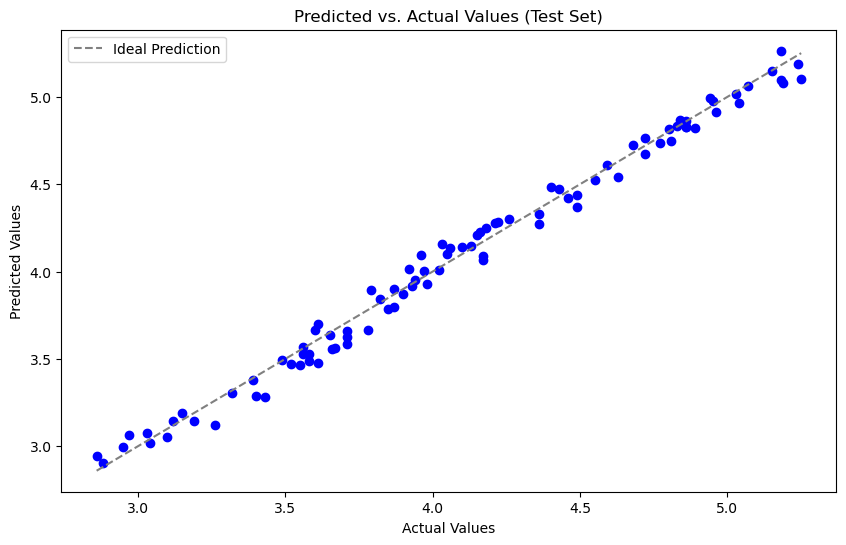

In [16]:
#Plotting the Actual values vs Predicted Value of the network

plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [17]:
#Computing various error metrics for comparative analysis

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.06911070035069236
RAE: 0.10621839511468135
MAE: 0.05786392647287122
R2: 0.9885974613340937


### Neural Network Training
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

In [18]:
x_reduced = data[['Temp min', 'Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced, x_reduced, y_train, y_ = train_test_split(x_reduced, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced, x_test_reduced, y_cv, y_test = train_test_split(x_reduced, y_, test_size=0.50, random_state=1)


In [19]:
scaler = StandardScaler()
x_train_scaled_reduced = scaler.fit_transform(x_train_reduced)
x_cv_scaled__reduced = scaler.transform(x_cv_reduced)
x_test_scaled_reduced = scaler.transform(x_test_reduced)

In [20]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 20.5575 - mae: 4.4909
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 19.2807 - mae: 4.3464
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 18.1261 - mae: 4.2102
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 17.0262 - mae: 4.0758
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 16.0329 - mae: 3.9490
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 15.0864 - mae: 3.8244
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 14.2155 - mae: 3.7051
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 13.3985 - mae: 3.5881
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 12.6214 - mae: 3.4736
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 11.8948 - mae: 3.3626
Epoch 11/300
9/9 [==============================] - 0s 4ms/step - los

9/9 [==============================] - 0s 4ms/step - loss: 0.3276 - mae: 0.4590
Epoch 90/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3158 - mae: 0.4508
Epoch 91/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3044 - mae: 0.4424
Epoch 92/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2931 - mae: 0.4338
Epoch 93/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2824 - mae: 0.4263
Epoch 94/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2718 - mae: 0.4183
Epoch 95/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2621 - mae: 0.4108
Epoch 96/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2526 - mae: 0.4033
Epoch 97/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2432 - mae: 0.3957
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2344 - mae: 0.3882
Epoch 99/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2260 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0295 - mae: 0.1340
Epoch 264/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0294 - mae: 0.1339
Epoch 265/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0294 - mae: 0.1339
Epoch 266/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0295 - mae: 0.1342
Epoch 267/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0294 - mae: 0.1339
Epoch 268/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0293 - mae: 0.1334
Epoch 269/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0293 - mae: 0.1337
Epoch 270/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0292 - mae: 0.1334
Epoch 271/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0292 - mae: 0.1331
Epoch 272/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0291 - mae: 0.1330
Epoch 273/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.1242 - mae: 0.1768
Epoch 138/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1232 - mae: 0.1756
Epoch 139/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1224 - mae: 0.1747
Epoch 140/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1217 - mae: 0.1739
Epoch 141/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1210 - mae: 0.1729
Epoch 142/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1201 - mae: 0.1719
Epoch 143/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1194 - mae: 0.1710
Epoch 144/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1186 - mae: 0.1702
Epoch 145/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1179 - mae: 0.1692
Epoch 146/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1172 - mae: 0.1683
Epoch 147/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 7.1470 - mae: 2.4766
Epoch 12/300
9/9 [==============================] - 0s 4ms/step - loss: 6.4514 - mae: 2.3358
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 5.8019 - mae: 2.1991
Epoch 14/300
9/9 [==============================] - 0s 6ms/step - loss: 5.1857 - mae: 2.0595
Epoch 15/300
9/9 [==============================] - 0s 6ms/step - loss: 4.6289 - mae: 1.9263
Epoch 16/300
9/9 [==============================] - 0s 4ms/step - loss: 4.1082 - mae: 1.7930
Epoch 17/300
9/9 [==============================] - 0s 5ms/step - loss: 3.6465 - mae: 1.6634
Epoch 18/300
9/9 [==============================] - 0s 4ms/step - loss: 3.2426 - mae: 1.5407
Epoch 19/300
9/9 [==============================] - 0s 4ms/step - loss: 2.8848 - mae: 1.4226
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 2.5894 - mae: 1.3155
Epoch 21/300
9/9 [==============================] - 0s 4ms/step - loss: 2.3462 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.1095 - mae: 0.1397
Epoch 187/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1088 - mae: 0.1390
Epoch 188/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1080 - mae: 0.1388
Epoch 189/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1072 - mae: 0.1384
Epoch 190/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1064 - mae: 0.1377
Epoch 191/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1056 - mae: 0.1377
Epoch 192/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1048 - mae: 0.1373
Epoch 193/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1041 - mae: 0.1365
Epoch 194/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1033 - mae: 0.1372
Epoch 195/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1026 - mae: 0.1374
Epoch 196/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.6871 - mae: 0.4160
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6625 - mae: 0.4045
Epoch 62/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6391 - mae: 0.3938
Epoch 63/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6165 - mae: 0.3829
Epoch 64/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5950 - mae: 0.3726
Epoch 65/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5741 - mae: 0.3620
Epoch 66/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5549 - mae: 0.3532
Epoch 67/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5357 - mae: 0.3429
Epoch 68/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5180 - mae: 0.3335
Epoch 69/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5004 - mae: 0.3242
Epoch 70/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4843 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.0530 - mae: 0.1403
Epoch 235/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0530 - mae: 0.1406
Epoch 236/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0528 - mae: 0.1414
Epoch 237/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0526 - mae: 0.1409
Epoch 238/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0525 - mae: 0.1402
Epoch 239/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0523 - mae: 0.1408
Epoch 240/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0524 - mae: 0.1418
Epoch 241/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0521 - mae: 0.1408
Epoch 242/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0519 - mae: 0.1400
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0519 - mae: 0.1404
Epoch 244/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.2126 - mae: 0.1653
Epoch 110/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2073 - mae: 0.1640
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2022 - mae: 0.1627
Epoch 112/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1975 - mae: 0.1618
Epoch 113/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1928 - mae: 0.1607
Epoch 114/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1883 - mae: 0.1597
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1840 - mae: 0.1588
Epoch 116/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1799 - mae: 0.1581
Epoch 117/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1759 - mae: 0.1574
Epoch 118/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1720 - mae: 0.1567
Epoch 119/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.0539 - mae: 0.1530
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0536 - mae: 0.1521
Epoch 285/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0537 - mae: 0.1524
Epoch 286/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0535 - mae: 0.1520
Epoch 287/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0536 - mae: 0.1525
Epoch 288/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0535 - mae: 0.1522
Epoch 289/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0536 - mae: 0.1527
Epoch 290/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0537 - mae: 0.1536
Epoch 291/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0537 - mae: 0.1522
Epoch 292/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0534 - mae: 0.1514
Epoch 293/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0757 - mae: 0.1620
Epoch 158/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0752 - mae: 0.1618
Epoch 159/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0743 - mae: 0.1619
Epoch 160/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0737 - mae: 0.1624
Epoch 161/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0733 - mae: 0.1630
Epoch 162/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0727 - mae: 0.1625
Epoch 163/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0721 - mae: 0.1618
Epoch 164/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0718 - mae: 0.1617
Epoch 165/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0712 - mae: 0.1620
Epoch 166/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0708 - mae: 0.1633
Epoch 167/300
9/9 [==============================] - 0s 6ms/step - loss: 

In [21]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.02, CV MSE: 0.01
Model 5: Training MSE: 0.02, CV MSE: 0.02
Model 6: Training MSE: 0.02, CV MSE: 0.02


In [22]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 2
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [23]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame to compare the results of the prediction to the actual value
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.94          3.933470
1           3.97          4.332422
2           3.49          3.407924
3           3.87          3.886728
4           3.93          3.787561
5           4.86          4.494512
6           4.83          4.614874

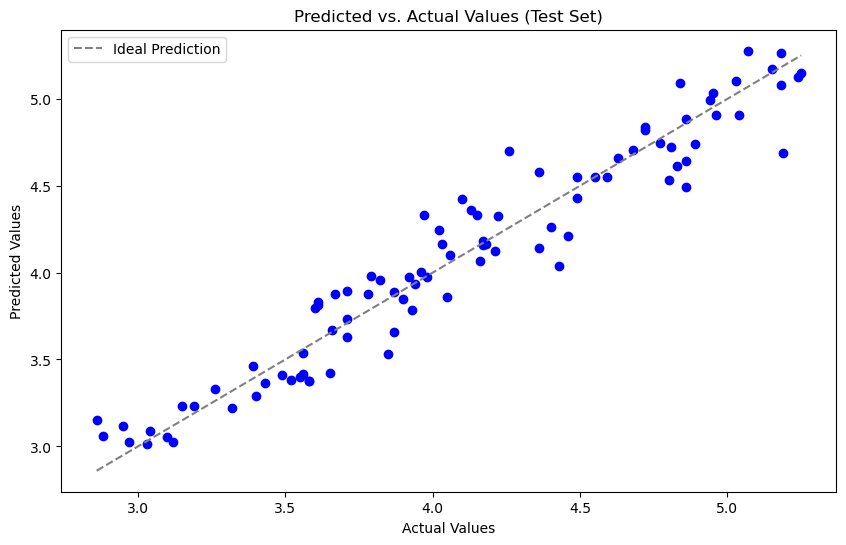

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16945741853893198
RAE: 0.24418575175143245
MAE: 0.13302353485770851
R2: 0.9314461045232201


### Neural Network Training
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [26]:
x_reduced2 = data[['Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced2, x_reduced2, y_train, y_ = train_test_split(x_reduced2, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced2, x_test_reduced2, y_cv, y_test = train_test_split(x_reduced2, y_, test_size=0.50, random_state=1)


In [27]:
scaler = StandardScaler()
x_train_scaled_reduced2 = scaler.fit_transform(x_train_reduced2)
x_cv_scaled__reduced2 = scaler.transform(x_cv_reduced2)
x_test_scaled_reduced2 = scaler.transform(x_test_reduced2)

In [90]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced2, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 18.7059 - mae: 4.2854
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 17.7455 - mae: 4.1610
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 16.8757 - mae: 4.0412
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 16.0827 - mae: 3.9243
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 15.3821 - mae: 3.8157
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 14.7460 - mae: 3.7115
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 14.1450 - mae: 3.6056
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 13.6060 - mae: 3.5091
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 13.0967 - mae: 3.4106
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 12.6179 - mae: 3.3190
Epoch 11/300
9/9 [==============================] - 0s 6ms/step - los

9/9 [==============================] - 0s 4ms/step - loss: 0.1997 - mae: 0.3493
Epoch 90/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1912 - mae: 0.3414
Epoch 91/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1835 - mae: 0.3342
Epoch 92/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1758 - mae: 0.3268
Epoch 93/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1686 - mae: 0.3201
Epoch 94/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1613 - mae: 0.3128
Epoch 95/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1549 - mae: 0.3067
Epoch 96/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1486 - mae: 0.3004
Epoch 97/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1431 - mae: 0.2944
Epoch 98/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1370 - mae: 0.2884
Epoch 99/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1318 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.1539
Epoch 177/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0400 - mae: 0.1536
Epoch 178/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0399 - mae: 0.1536
Epoch 179/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0398 - mae: 0.1531
Epoch 180/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0397 - mae: 0.1528
Epoch 181/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0396 - mae: 0.1525
Epoch 182/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0395 - mae: 0.1524
Epoch 183/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0395 - mae: 0.1523
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0394 - mae: 0.1520
Epoch 185/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0393 - mae: 0.1519
Epoch 186/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0358 - mae: 0.1443
Epoch 264/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0360 - mae: 0.1448
Epoch 265/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0357 - mae: 0.1445
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0358 - mae: 0.1443
Epoch 267/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0357 - mae: 0.1445
Epoch 268/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0357 - mae: 0.1447
Epoch 269/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0357 - mae: 0.1448
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0356 - mae: 0.1448
Epoch 271/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0357 - mae: 0.1445
Epoch 272/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0356 - mae: 0.1440
Epoch 273/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.7977 - mae: 0.6818
Epoch 51/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7652 - mae: 0.6664
Epoch 52/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7334 - mae: 0.6510
Epoch 53/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7033 - mae: 0.6362
Epoch 54/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6746 - mae: 0.6220
Epoch 55/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6453 - mae: 0.6078
Epoch 56/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6177 - mae: 0.5930
Epoch 57/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5908 - mae: 0.5780
Epoch 58/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5645 - mae: 0.5635
Epoch 59/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5389 - mae: 0.5493
Epoch 60/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5143 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0888 - mae: 0.1608
Epoch 138/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0883 - mae: 0.1600
Epoch 139/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0878 - mae: 0.1590
Epoch 140/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0874 - mae: 0.1583
Epoch 141/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0869 - mae: 0.1576
Epoch 142/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0865 - mae: 0.1573
Epoch 143/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0861 - mae: 0.1566
Epoch 144/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0856 - mae: 0.1558
Epoch 145/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0852 - mae: 0.1553
Epoch 146/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0848 - mae: 0.1546
Epoch 147/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0668 - mae: 0.1371
Epoch 225/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0667 - mae: 0.1373
Epoch 226/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0664 - mae: 0.1370
Epoch 227/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0663 - mae: 0.1367
Epoch 228/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0664 - mae: 0.1377
Epoch 229/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0660 - mae: 0.1373
Epoch 230/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0658 - mae: 0.1368
Epoch 231/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0657 - mae: 0.1370
Epoch 232/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0655 - mae: 0.1373
Epoch 233/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0656 - mae: 0.1384
Epoch 234/300
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 9.3376 - mae: 2.7281
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 8.8233 - mae: 2.6520
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 8.3129 - mae: 2.5734
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 7.7939 - mae: 2.4919
Epoch 15/300
9/9 [==============================] - 0s 4ms/step - loss: 7.2700 - mae: 2.4065
Epoch 16/300
9/9 [==============================] - 0s 4ms/step - loss: 6.7445 - mae: 2.3183
Epoch 17/300
9/9 [==============================] - 0s 4ms/step - loss: 6.2271 - mae: 2.2271
Epoch 18/300
9/9 [==============================] - 0s 4ms/step - loss: 5.6886 - mae: 2.1281
Epoch 19/300
9/9 [==============================] - 0s 4ms/step - loss: 5.1827 - mae: 2.0291
Epoch 20/300
9/9 [==============================] - 0s 4ms/step - loss: 4.6848 - mae: 1.9244
Epoch 21/300
9/9 [==============================] - 0s 4ms/step - loss: 4.1925 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.1930 - mae: 0.2090
Epoch 100/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1911 - mae: 0.2068
Epoch 101/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1893 - mae: 0.2052
Epoch 102/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1875 - mae: 0.2036
Epoch 103/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1856 - mae: 0.2011
Epoch 104/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1842 - mae: 0.2003
Epoch 105/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1824 - mae: 0.1984
Epoch 106/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1808 - mae: 0.1963
Epoch 107/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1792 - mae: 0.1947
Epoch 108/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1780 - mae: 0.1948
Epoch 109/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.1101 - mae: 0.1512
Epoch 187/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1096 - mae: 0.1516
Epoch 188/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1089 - mae: 0.1506
Epoch 189/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1083 - mae: 0.1502
Epoch 190/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1077 - mae: 0.1505
Epoch 191/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1071 - mae: 0.1502
Epoch 192/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1065 - mae: 0.1498
Epoch 193/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1060 - mae: 0.1498
Epoch 194/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1056 - mae: 0.1502
Epoch 195/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1050 - mae: 0.1497
Epoch 196/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0728 - mae: 0.1465
Epoch 274/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0722 - mae: 0.1464
Epoch 275/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0727 - mae: 0.1492
Epoch 276/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0718 - mae: 0.1470
Epoch 277/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0716 - mae: 0.1462
Epoch 278/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0712 - mae: 0.1476
Epoch 279/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0709 - mae: 0.1474
Epoch 280/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0708 - mae: 0.1473
Epoch 281/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0704 - mae: 0.1472
Epoch 282/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0699 - mae: 0.1465
Epoch 283/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 1.0371 - mae: 0.5795
Epoch 61/300
9/9 [==============================] - 0s 4ms/step - loss: 1.0100 - mae: 0.5699
Epoch 62/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9835 - mae: 0.5602
Epoch 63/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9589 - mae: 0.5515
Epoch 64/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9335 - mae: 0.5415
Epoch 65/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9105 - mae: 0.5324
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8880 - mae: 0.5234
Epoch 67/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8660 - mae: 0.5147
Epoch 68/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8452 - mae: 0.5061
Epoch 69/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8253 - mae: 0.4982
Epoch 70/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8053 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.2235 - mae: 0.2101
Epoch 148/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2208 - mae: 0.2091
Epoch 149/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2182 - mae: 0.2083
Epoch 150/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2157 - mae: 0.2071
Epoch 151/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2132 - mae: 0.2062
Epoch 152/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2108 - mae: 0.2055
Epoch 153/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2083 - mae: 0.2046
Epoch 154/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2060 - mae: 0.2042
Epoch 155/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2037 - mae: 0.2037
Epoch 156/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2014 - mae: 0.2031
Epoch 157/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0975 - mae: 0.1766
Epoch 235/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0968 - mae: 0.1761
Epoch 236/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0962 - mae: 0.1763
Epoch 237/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0952 - mae: 0.1760
Epoch 238/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0946 - mae: 0.1754
Epoch 239/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0939 - mae: 0.1757
Epoch 240/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0932 - mae: 0.1756
Epoch 241/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0924 - mae: 0.1751
Epoch 242/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0917 - mae: 0.1749
Epoch 243/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0912 - mae: 0.1752
Epoch 244/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 3.7814 - mae: 1.3916
Epoch 22/300
9/9 [==============================] - 0s 5ms/step - loss: 3.5647 - mae: 1.3197
Epoch 23/300
9/9 [==============================] - 0s 4ms/step - loss: 3.3750 - mae: 1.2525
Epoch 24/300
9/9 [==============================] - 0s 4ms/step - loss: 3.2025 - mae: 1.1922
Epoch 25/300
9/9 [==============================] - 0s 4ms/step - loss: 3.0498 - mae: 1.1401
Epoch 26/300
9/9 [==============================] - 0s 4ms/step - loss: 2.9160 - mae: 1.0937
Epoch 27/300
9/9 [==============================] - 0s 7ms/step - loss: 2.7915 - mae: 1.0539
Epoch 28/300
9/9 [==============================] - 0s 4ms/step - loss: 2.6749 - mae: 1.0160
Epoch 29/300
9/9 [==============================] - 0s 4ms/step - loss: 2.5721 - mae: 0.9820
Epoch 30/300
9/9 [==============================] - 0s 4ms/step - loss: 2.4716 - mae: 0.9495
Epoch 31/300
9/9 [==============================] - 0s 4ms/step - loss: 2.3775 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.2338 - mae: 0.1917
Epoch 110/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2292 - mae: 0.1904
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2247 - mae: 0.1894
Epoch 112/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2202 - mae: 0.1880
Epoch 113/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2160 - mae: 0.1868
Epoch 114/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2118 - mae: 0.1856
Epoch 115/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2078 - mae: 0.1848
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2037 - mae: 0.1839
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1998 - mae: 0.1831
Epoch 118/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1960 - mae: 0.1818
Epoch 119/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.0721 - mae: 0.1743
Epoch 197/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0713 - mae: 0.1736
Epoch 198/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0715 - mae: 0.1752
Epoch 199/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0710 - mae: 0.1739
Epoch 200/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0702 - mae: 0.1735
Epoch 201/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0698 - mae: 0.1734
Epoch 202/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0695 - mae: 0.1734
Epoch 203/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0690 - mae: 0.1730
Epoch 204/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0687 - mae: 0.1731
Epoch 205/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0685 - mae: 0.1731
Epoch 206/300
9/9 [==============================] - 0s 4ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.0590 - mae: 0.1724
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0596 - mae: 0.1742
Epoch 285/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0594 - mae: 0.1742
Epoch 286/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0591 - mae: 0.1732
Epoch 287/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0592 - mae: 0.1733
Epoch 288/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0593 - mae: 0.1728
Epoch 289/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0592 - mae: 0.1723
Epoch 290/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0589 - mae: 0.1721
Epoch 291/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0590 - mae: 0.1740
Epoch 292/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0590 - mae: 0.1745
Epoch 293/300
9/9 [==============================] - 0s 7ms/step - loss:

9/9 [==============================] - 0s 5ms/step - loss: 0.5599 - mae: 0.2529
Epoch 71/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5395 - mae: 0.2483
Epoch 72/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5203 - mae: 0.2446
Epoch 73/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5015 - mae: 0.2407
Epoch 74/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4837 - mae: 0.2363
Epoch 75/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4666 - mae: 0.2326
Epoch 76/300
9/9 [==============================] - 0s 10ms/step - loss: 0.4501 - mae: 0.2286
Epoch 77/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4345 - mae: 0.2248
Epoch 78/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4195 - mae: 0.2213
Epoch 79/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4049 - mae: 0.2183
Epoch 80/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3912 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.0804 - mae: 0.1765
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0800 - mae: 0.1764
Epoch 159/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0794 - mae: 0.1763
Epoch 160/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0790 - mae: 0.1764
Epoch 161/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0785 - mae: 0.1764
Epoch 162/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0783 - mae: 0.1774
Epoch 163/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0777 - mae: 0.1772
Epoch 164/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0773 - mae: 0.1767
Epoch 165/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0769 - mae: 0.1768
Epoch 166/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0767 - mae: 0.1770
Epoch 167/300
9/9 [==============================] - 0s 14ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.0691 - mae: 0.1792
Epoch 245/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0690 - mae: 0.1798
Epoch 246/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0692 - mae: 0.1808
Epoch 247/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.1795
Epoch 248/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.1788
Epoch 249/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0689 - mae: 0.1794
Epoch 250/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0689 - mae: 0.1801
Epoch 251/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0688 - mae: 0.1793
Epoch 252/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0690 - mae: 0.1801
Epoch 253/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0692 - mae: 0.1797
Epoch 254/300
9/9 [==============================] - 0s 5ms/step - loss: 0

In [91]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced2)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced2)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.02, CV MSE: 0.02
Model 5: Training MSE: 0.02, CV MSE: 0.02
Model 6: Training MSE: 0.03, CV MSE: 0.02


In [92]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced2)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 8ms/step
Selected Model: 5
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.02


In [93]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.94          3.938073
1           3.97          4.380280
2           3.49          3.462085
3           3.87          3.852070
4           3.93          3.831993
5           4.86          4.478742
6           4.83          4.505706

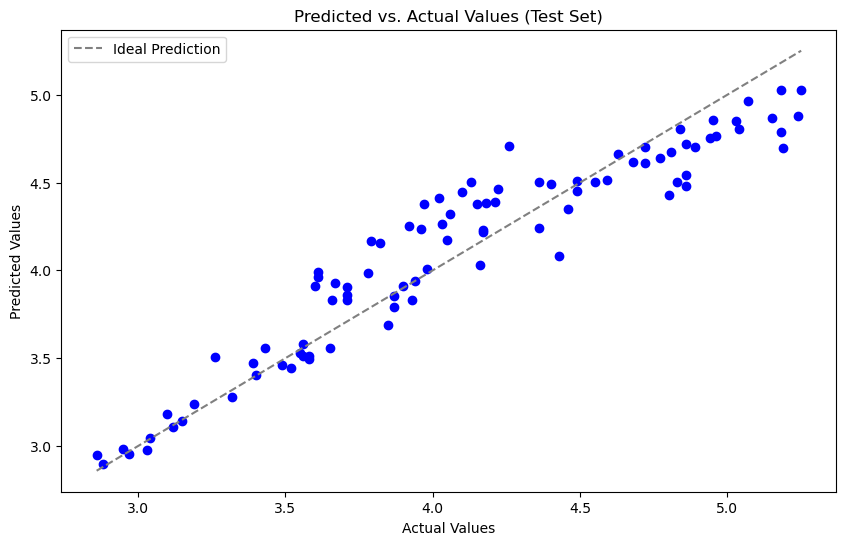

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.20811246016649926
RAE: 0.2995613573310493
MAE: 0.16319015492563665
R2: 0.8966031919451745


### Neural Network Training
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [34]:
x_reduced3 = data[['Sunlight hours','Solar Radiation', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced3, x_reduced3, y_train, y_ = train_test_split(x_reduced3, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced3, x_test_reduced3, y_cv, y_test = train_test_split(x_reduced3, y_, test_size=0.50, random_state=1)



In [35]:
scaler = StandardScaler()
x_train_scaled_reduced3 = scaler.fit_transform(x_train_reduced3)
x_cv_scaled__reduced3 = scaler.transform(x_cv_reduced3)
x_test_scaled_reduced3 = scaler.transform(x_test_reduced3)

In [36]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced3, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 18.2986 - mae: 4.1637
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 17.2591 - mae: 4.0469
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 16.2891 - mae: 3.9338
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 15.3565 - mae: 3.8212
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 14.4615 - mae: 3.7086
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 13.6000 - mae: 3.5965
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 12.7612 - mae: 3.4837
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 11.9712 - mae: 3.3712
Epoch 9/300
9/9 [==============================] - 0s 6ms/step - loss: 11.1759 - mae: 3.2557
Epoch 10/300
9/9 [==============================] - 0s 5ms/step - loss: 10.4257 - mae: 3.1412
Epoch 11/300
9/9 [==============================] - 0s 5ms/step - los

9/9 [==============================] - 0s 4ms/step - loss: 0.2049 - mae: 0.3598
Epoch 90/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1990 - mae: 0.3538
Epoch 91/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1925 - mae: 0.3474
Epoch 92/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1866 - mae: 0.3415
Epoch 93/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1811 - mae: 0.3356
Epoch 94/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1756 - mae: 0.3300
Epoch 95/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1702 - mae: 0.3242
Epoch 96/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1656 - mae: 0.3189
Epoch 97/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1603 - mae: 0.3137
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1558 - mae: 0.3091
Epoch 99/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1516 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0502 - mae: 0.1724
Epoch 264/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0503 - mae: 0.1723
Epoch 265/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0501 - mae: 0.1721
Epoch 266/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0500 - mae: 0.1719
Epoch 267/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0499 - mae: 0.1716
Epoch 268/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0499 - mae: 0.1715
Epoch 269/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0500 - mae: 0.1718
Epoch 270/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0498 - mae: 0.1715
Epoch 271/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0498 - mae: 0.1708
Epoch 272/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0497 - mae: 0.1708
Epoch 273/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.1166 - mae: 0.2115
Epoch 138/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1159 - mae: 0.2108
Epoch 139/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1151 - mae: 0.2099
Epoch 140/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1144 - mae: 0.2090
Epoch 141/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1137 - mae: 0.2080
Epoch 142/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1130 - mae: 0.2073
Epoch 143/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1125 - mae: 0.2068
Epoch 144/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1117 - mae: 0.2062
Epoch 145/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1111 - mae: 0.2054
Epoch 146/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1106 - mae: 0.2050
Epoch 147/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 8.1927 - mae: 2.7849
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 7.5974 - mae: 2.6709
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 7.0297 - mae: 2.5563
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 6.4898 - mae: 2.4420
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 5.9832 - mae: 2.3281
Epoch 16/300
9/9 [==============================] - 0s 5ms/step - loss: 5.4966 - mae: 2.2132
Epoch 17/300
9/9 [==============================] - 0s 6ms/step - loss: 5.0489 - mae: 2.1000
Epoch 18/300
9/9 [==============================] - 0s 5ms/step - loss: 4.6260 - mae: 1.9883
Epoch 19/300
9/9 [==============================] - 0s 5ms/step - loss: 4.2322 - mae: 1.8797
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 3.8713 - mae: 1.7715
Epoch 21/300
9/9 [==============================] - 0s 6ms/step - loss: 3.5444 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.1174 - mae: 0.1686
Epoch 187/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1168 - mae: 0.1682
Epoch 188/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.1680
Epoch 189/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1156 - mae: 0.1677
Epoch 190/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1150 - mae: 0.1676
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1145 - mae: 0.1677
Epoch 192/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1139 - mae: 0.1675
Epoch 193/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1133 - mae: 0.1672
Epoch 194/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.1670
Epoch 195/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1123 - mae: 0.1670
Epoch 196/300
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 9ms/step - loss: 1.0083 - mae: 0.5774
Epoch 61/300
9/9 [==============================] - 0s 6ms/step - loss: 0.9830 - mae: 0.5668
Epoch 62/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9587 - mae: 0.5559
Epoch 63/300
9/9 [==============================] - 0s 6ms/step - loss: 0.9347 - mae: 0.5451
Epoch 64/300
9/9 [==============================] - 0s 6ms/step - loss: 0.9099 - mae: 0.5338
Epoch 65/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8871 - mae: 0.5234
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8639 - mae: 0.5125
Epoch 67/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8410 - mae: 0.5015
Epoch 68/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8187 - mae: 0.4906
Epoch 69/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7977 - mae: 0.4804
Epoch 70/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7768 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0914 - mae: 0.1833
Epoch 235/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0910 - mae: 0.1834
Epoch 236/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0906 - mae: 0.1837
Epoch 237/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0901 - mae: 0.1836
Epoch 238/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0895 - mae: 0.1832
Epoch 239/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0891 - mae: 0.1834
Epoch 240/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0888 - mae: 0.1840
Epoch 241/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0883 - mae: 0.1836
Epoch 242/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0879 - mae: 0.1838
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0874 - mae: 0.1838
Epoch 244/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.1753 - mae: 0.1794
Epoch 110/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1722 - mae: 0.1795
Epoch 111/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1691 - mae: 0.1797
Epoch 112/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1662 - mae: 0.1800
Epoch 113/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1632 - mae: 0.1802
Epoch 114/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1602 - mae: 0.1802
Epoch 115/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1575 - mae: 0.1803
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1549 - mae: 0.1804
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1521 - mae: 0.1805
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1496 - mae: 0.1808
Epoch 119/300
9/9 [==============================] - 0s 8ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0736 - mae: 0.1925
Epoch 284/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0733 - mae: 0.1917
Epoch 285/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0734 - mae: 0.1917
Epoch 286/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0737 - mae: 0.1914
Epoch 287/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0733 - mae: 0.1909
Epoch 288/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0735 - mae: 0.1922
Epoch 289/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0735 - mae: 0.1926
Epoch 290/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0732 - mae: 0.1921
Epoch 291/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0732 - mae: 0.1916
Epoch 292/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0731 - mae: 0.1916
Epoch 293/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.1007 - mae: 0.2013
Epoch 158/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0999 - mae: 0.2019
Epoch 159/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0994 - mae: 0.2016
Epoch 160/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0987 - mae: 0.2017
Epoch 161/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0980 - mae: 0.2017
Epoch 162/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0974 - mae: 0.2019
Epoch 163/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0968 - mae: 0.2023
Epoch 164/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0962 - mae: 0.2031
Epoch 165/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0956 - mae: 0.2033
Epoch 166/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0951 - mae: 0.2029
Epoch 167/300
9/9 [==============================] - 0s 5ms/step - loss: 0

In [37]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced3)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced3)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.03
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.03, CV MSE: 0.02
Model 5: Training MSE: 0.03, CV MSE: 0.03
Model 6: Training MSE: 0.03, CV MSE: 0.03


In [38]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced3)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 3
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.02


In [39]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.94          4.043519
1           3.97          4.417671
2           3.49          3.566224
3           3.87          4.148385
4           3.93          3.943805
5           4.86          4.597300
6           4.83          4.649515

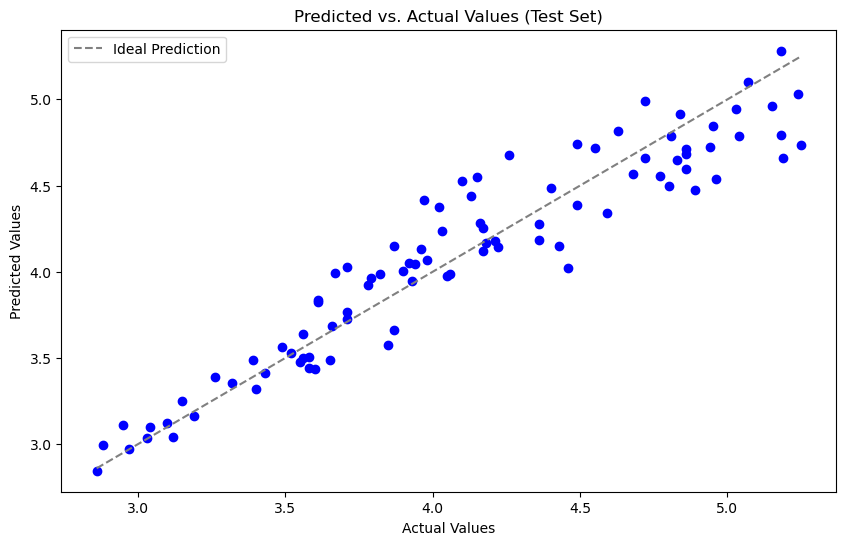

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.20966055256384236
RAE: 0.30339870203690505
MAE: 0.16528060104535974
R2: 0.8950591886409164


### Neural Network Training
### Model 5: Three input features: Temp min and max, Wind speed

In [42]:
x_reduced4 = data[['Temp max','Wind speed', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced4, x_reduced4, y_train, y_ = train_test_split(x_reduced4, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced4, x_test_reduced4, y_cv, y_test = train_test_split(x_reduced4, y_, test_size=0.50, random_state=1)


In [43]:
scaler = StandardScaler()
x_train_scaled_reduced4 = scaler.fit_transform(x_train_reduced4)
x_cv_scaled__reduced4 = scaler.transform(x_cv_reduced4)
x_test_scaled_reduced4 = scaler.transform(x_test_reduced4)

In [44]:
lambdas = [0, 0.01, 0.03, 0.5]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced4, y_train,
    epochs=250
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/250
9/9 [==============================] - 1s 5ms/step - loss: 19.6923 - mae: 4.2996
Epoch 2/250
9/9 [==============================] - 0s 5ms/step - loss: 18.5487 - mae: 4.1735
Epoch 3/250
9/9 [==============================] - 0s 6ms/step - loss: 17.4634 - mae: 4.0493
Epoch 4/250
9/9 [==============================] - 0s 8ms/step - loss: 16.4132 - mae: 3.9247
Epoch 5/250
9/9 [==============================] - 0s 9ms/step - loss: 15.3948 - mae: 3.8000
Epoch 6/250
9/9 [==============================] - 0s 6ms/step - loss: 14.4424 - mae: 3.6771
Epoch 7/250
9/9 [==============================] - 0s 6ms/step - loss: 13.5142 - mae: 3.5532
Epoch 8/250
9/9 [==============================] - 0s 5ms/step - loss: 12.6053 - mae: 3.4279
Epoch 9/250
9/9 [==============================] - 0s 5ms/step - loss: 11.7287 - mae: 3.3020
Epoch 10/250
9/9 [==============================] - 0s 6ms/step - loss: 10.8944 - mae: 3.1762
Epoch 11/250
9/9 [==============================] - 0s 6ms/step - los

9/9 [==============================] - 0s 5ms/step - loss: 0.2240 - mae: 0.3675
Epoch 90/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2202 - mae: 0.3645
Epoch 91/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2163 - mae: 0.3615
Epoch 92/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2129 - mae: 0.3586
Epoch 93/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2090 - mae: 0.3556
Epoch 94/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2053 - mae: 0.3523
Epoch 95/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2018 - mae: 0.3490
Epoch 96/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1985 - mae: 0.3461
Epoch 97/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1950 - mae: 0.3431
Epoch 98/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1918 - mae: 0.3401
Epoch 99/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1886 - ma

9/9 [==============================] - 0s 5ms/step - loss: 8.4100 - mae: 2.7947
Epoch 14/250
9/9 [==============================] - 0s 5ms/step - loss: 7.7373 - mae: 2.6730
Epoch 15/250
9/9 [==============================] - 0s 6ms/step - loss: 7.0981 - mae: 2.5513
Epoch 16/250
9/9 [==============================] - 0s 6ms/step - loss: 6.4864 - mae: 2.4274
Epoch 17/250
9/9 [==============================] - 0s 5ms/step - loss: 5.9003 - mae: 2.3033
Epoch 18/250
9/9 [==============================] - 0s 6ms/step - loss: 5.3490 - mae: 2.1794
Epoch 19/250
9/9 [==============================] - 0s 6ms/step - loss: 4.8298 - mae: 2.0550
Epoch 20/250
9/9 [==============================] - 0s 5ms/step - loss: 4.3530 - mae: 1.9324
Epoch 21/250
9/9 [==============================] - 0s 5ms/step - loss: 3.9015 - mae: 1.8107
Epoch 22/250
9/9 [==============================] - 0s 5ms/step - loss: 3.5060 - mae: 1.6904
Epoch 23/250
9/9 [==============================] - 0s 5ms/step - loss: 3.1261 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.0992 - mae: 0.1872
Epoch 189/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0985 - mae: 0.1866
Epoch 190/250
9/9 [==============================] - 0s 8ms/step - loss: 0.0979 - mae: 0.1860
Epoch 191/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0975 - mae: 0.1858
Epoch 192/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0970 - mae: 0.1854
Epoch 193/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0966 - mae: 0.1852
Epoch 194/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0961 - mae: 0.1844
Epoch 195/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0955 - mae: 0.1836
Epoch 196/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0951 - mae: 0.1835
Epoch 197/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0945 - mae: 0.1829
Epoch 198/250
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.1940 - mae: 0.2196
Epoch 114/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1915 - mae: 0.2175
Epoch 115/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1893 - mae: 0.2160
Epoch 116/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1870 - mae: 0.2141
Epoch 117/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1847 - mae: 0.2124
Epoch 118/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1825 - mae: 0.2110
Epoch 119/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1804 - mae: 0.2092
Epoch 120/250
9/9 [==============================] - 0s 9ms/step - loss: 0.1784 - mae: 0.2075
Epoch 121/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1762 - mae: 0.2057
Epoch 122/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1742 - mae: 0.2042
Epoch 123/250
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 1.9914 - mae: 0.5918
Epoch 38/250
9/9 [==============================] - 0s 5ms/step - loss: 1.8700 - mae: 0.5550
Epoch 39/250
9/9 [==============================] - 0s 5ms/step - loss: 1.7541 - mae: 0.5199
Epoch 40/250
9/9 [==============================] - 0s 6ms/step - loss: 1.6454 - mae: 0.4892
Epoch 41/250
9/9 [==============================] - 0s 5ms/step - loss: 1.5456 - mae: 0.4621
Epoch 42/250
9/9 [==============================] - 0s 5ms/step - loss: 1.4516 - mae: 0.4379
Epoch 43/250
9/9 [==============================] - 0s 5ms/step - loss: 1.3639 - mae: 0.4162
Epoch 44/250
9/9 [==============================] - 0s 5ms/step - loss: 1.2819 - mae: 0.3970
Epoch 45/250
9/9 [==============================] - 0s 6ms/step - loss: 1.2048 - mae: 0.3790
Epoch 46/250
9/9 [==============================] - 0s 5ms/step - loss: 1.1334 - mae: 0.3638
Epoch 47/250
9/9 [==============================] - 0s 6ms/step - loss: 1.0661 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0914 - mae: 0.2015
Epoch 212/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0914 - mae: 0.2010
Epoch 213/250
9/9 [==============================] - 0s 8ms/step - loss: 0.0919 - mae: 0.1989
Epoch 214/250
9/9 [==============================] - 0s 7ms/step - loss: 0.0916 - mae: 0.2010
Epoch 215/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0913 - mae: 0.2019
Epoch 216/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0912 - mae: 0.1998
Epoch 217/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0913 - mae: 0.1989
Epoch 218/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0913 - mae: 0.1995
Epoch 219/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0916 - mae: 0.2020
Epoch 220/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0913 - mae: 0.2008
Epoch 221/250
9/9 [==============================] - 0s 6ms/step - loss: 0

In [45]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced4)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced4)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.03
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.03, CV MSE: 0.03


In [46]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced4)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 3
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.02


In [47]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.94          4.018795
1           3.97          3.899000
2           3.49          3.468548
3           3.87          3.622674
4           3.93          3.670160
5           4.86          4.816484
6           4.83          4.942556

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.20099168515297053
RAE: 0.2897626452545594
MAE: 0.157852172229601
R2: 0.9035577912011963


### Decision Tree 
### Model 1: All input features

Mean Squared Error on Validation Set for Decision Tree: 0.02
Mean Squared Error for Decision Tree: 0.01


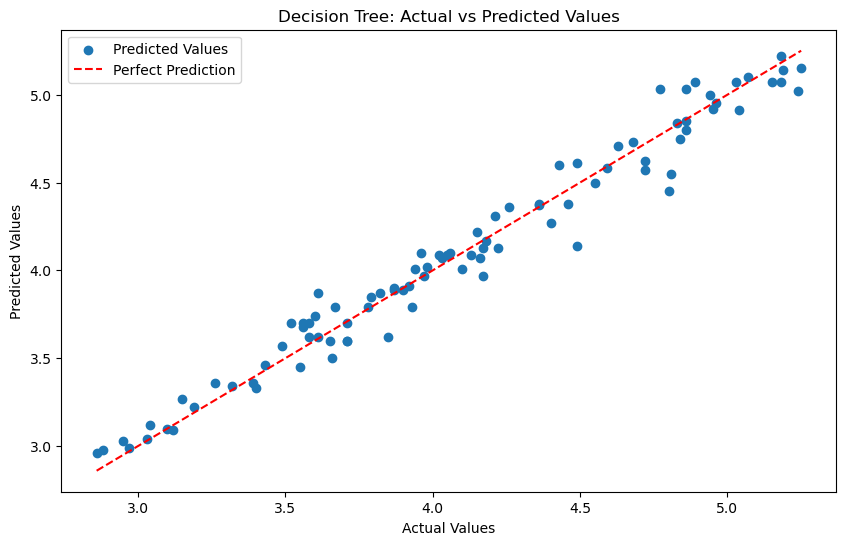

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree.fit(x_train_scaled, y_train)

yhat_cv = tree.predict(x_cv_scaled)

# Evaluating the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predicting on the test set
yhat_test = tree.predict(x_test_scaled)

# Evaluating the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualizing the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.11408901940075607
RAE: 0.15982198625858837
MAE: 0.08706521739130435
R2: 0.9689258927530088


### Decision Tree
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.03
Mean Squared Error for Decision Tree: 0.05


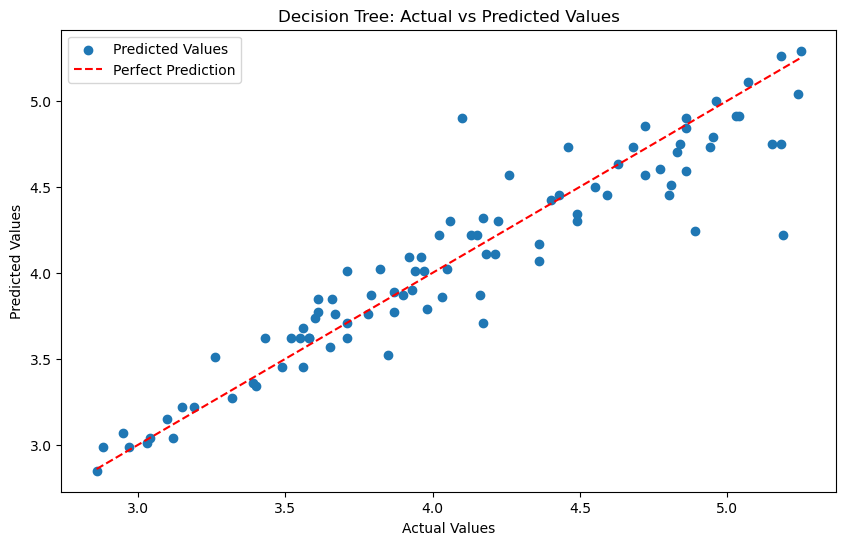

In [51]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2195845880392061
RAE: 0.2765459088069957
MAE: 0.1506521739130435
R2: 0.8848895701480977


### Decision Tree
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.07
Mean Squared Error for Decision Tree: 0.06


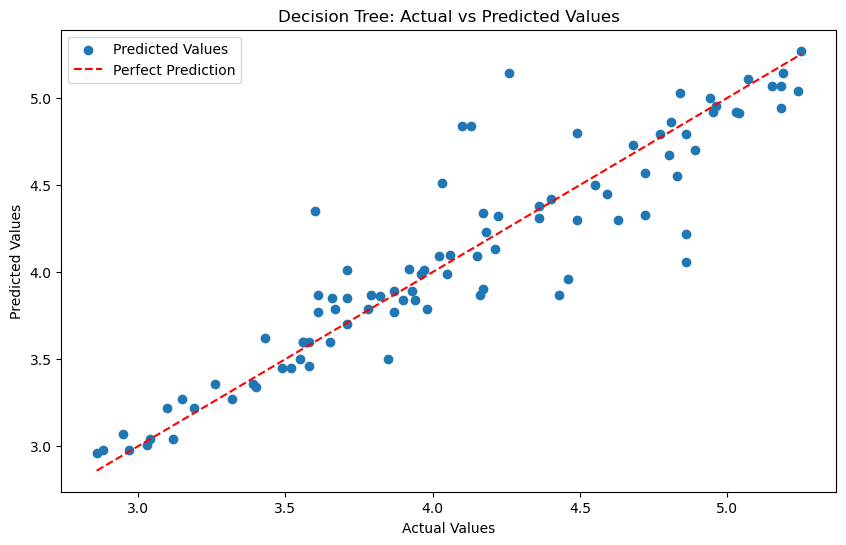

In [53]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced2, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced2)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced2)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.251853994970516
RAE: 0.29649871608022765
MAE: 0.1615217391304348
R2: 0.8485711396655182


### Decision Tree
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.08
Mean Squared Error for Decision Tree: 0.11


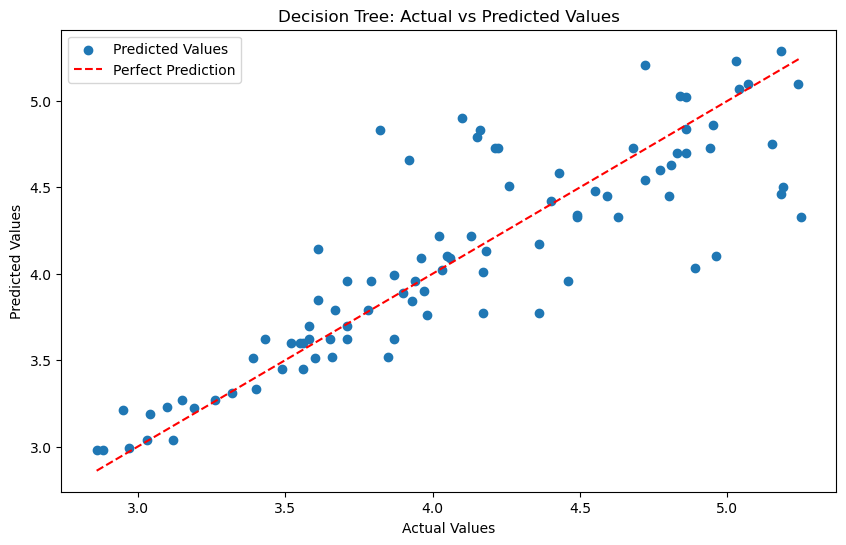

In [55]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced3, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced3)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced3)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.32775587415556456
RAE: 0.4102297175376501
MAE: 0.22347826086956524
R2: 0.7435445495432033


### Decision Tree
### Model 5: Three input features: Temp min, Temp max  and Wind speed

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.06


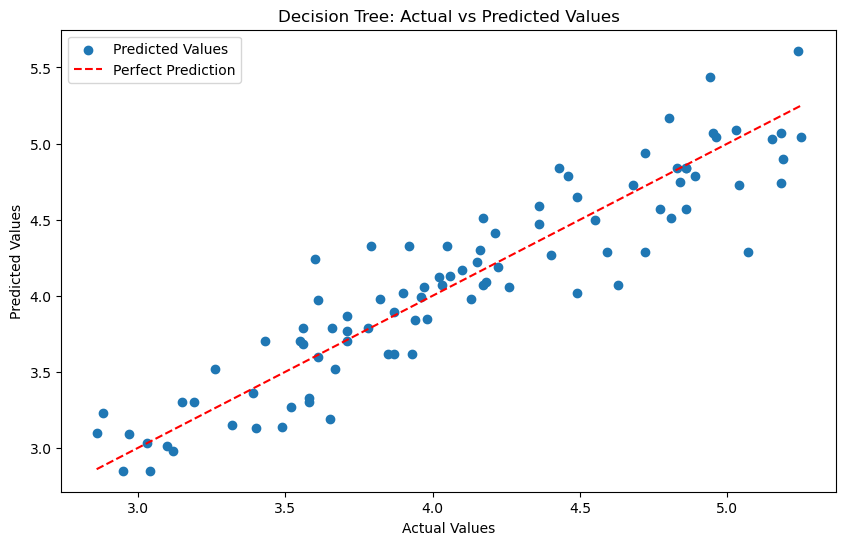

In [57]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced4, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced4)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced4)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.254776116551802
RAE: 0.3715212714275799
MAE: 0.20239130434782607
R2: 0.8450368654216434


### Random Forest
### Model 1: All input features

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.01


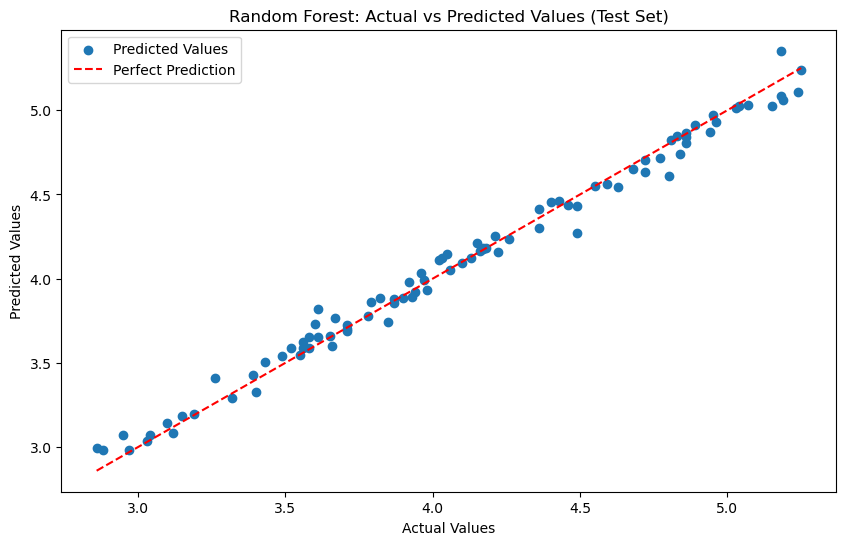

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [60]:
feature_list = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_list)

# Get feature importances
feature_list = list(x_train_df.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print feature importances
print(feature_imp)

Temp max           0.485206
Solar Radiation    0.310546
Wind speed         0.166510
Sunlight hours     0.034570
Temp min           0.003169
dtype: float64


In [61]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07248418343215389
RAE: 0.09845313692830868
MAE: 0.05363369565217391
R2: 0.9874571142316844


### Random Forest
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.03


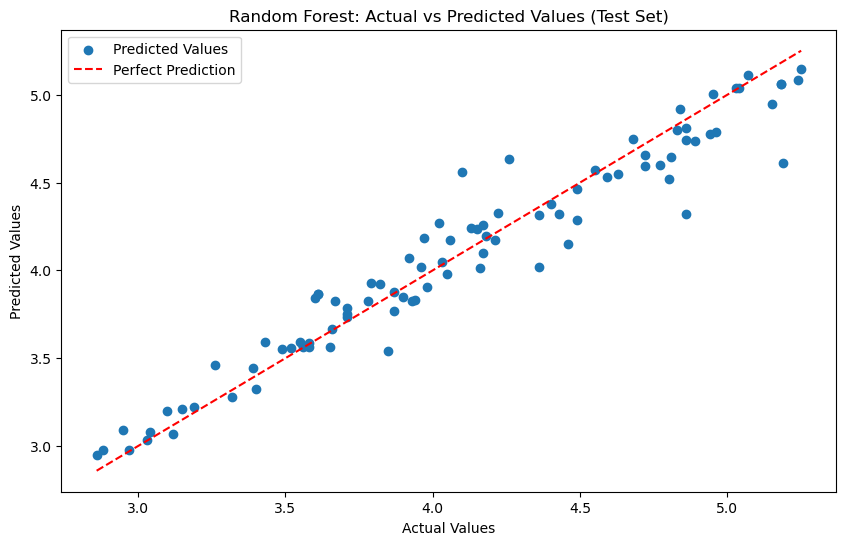

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1610430923967111
RAE: 0.21270490665556316
MAE: 0.11587391304347862
R2: 0.9380851010613626


### Random Forest
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.04


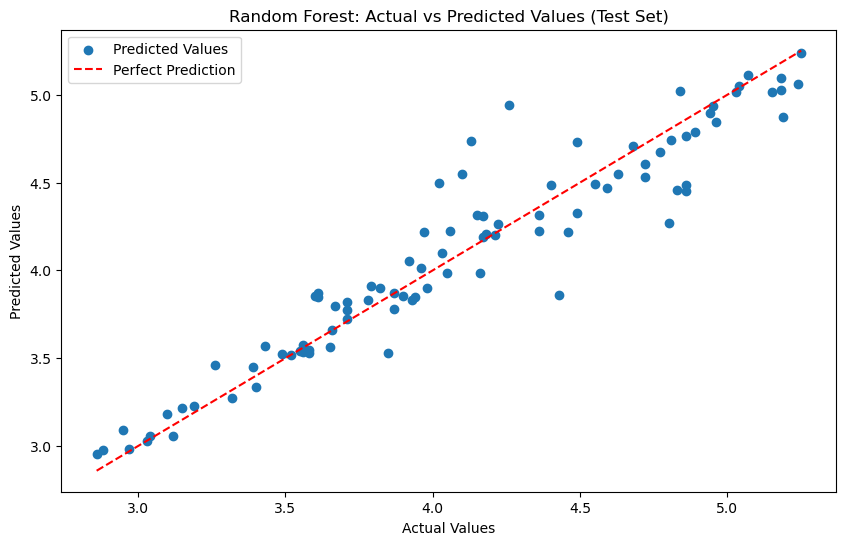

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced2, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [65]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1963846087788378
RAE: 0.24712748976334206
MAE: 0.1346260869565216
R2: 0.9079283637382634


### Random Forest
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.05


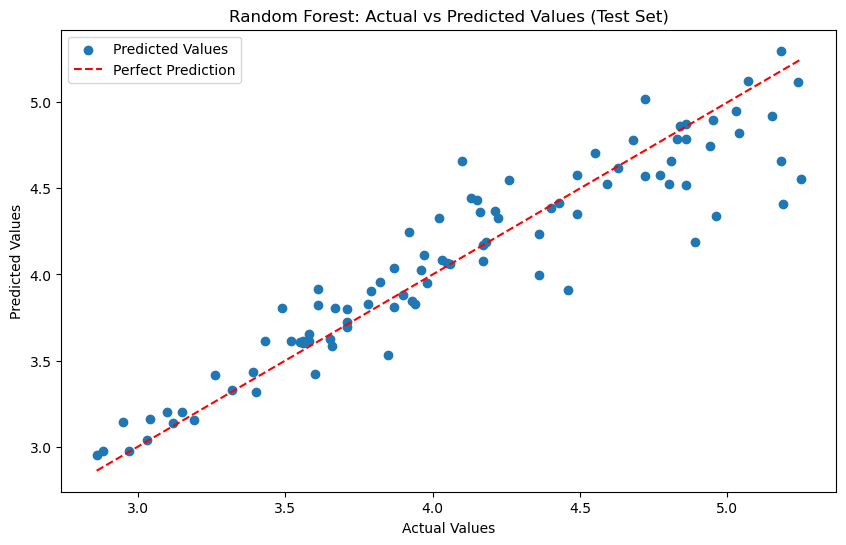

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced3, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22984371817086627
RAE: 0.2891840169338604
MAE: 0.15753695652173896
R2: 0.8738822416850253


### Random Forest
### Model 5: Three input features: Temp min and max, Wind speed

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.04


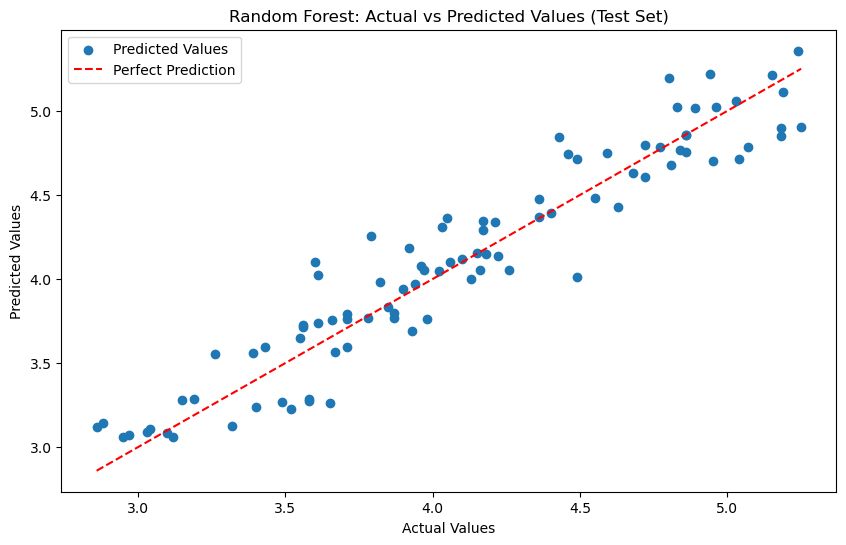

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced4, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [69]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.20176649951388642
RAE: 0.2948526094801866
MAE: 0.16062500000000035
R2: 0.9028127968120901


### Xgboost 
### Model 1: All input features

Mean Squared Error on Validation Set for XGBoost: 0.01
Mean Squared Error on Test Set for XGBoost: 0.01


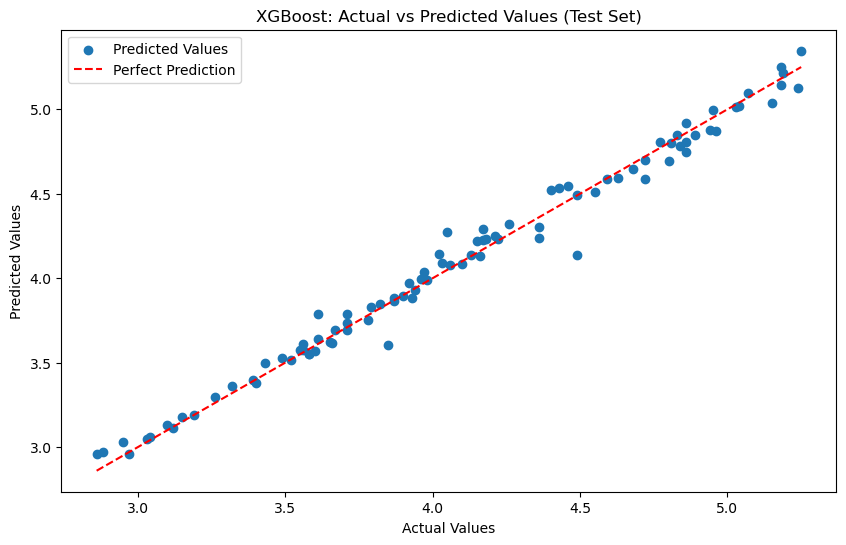

In [70]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_cv = xgb_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Predict on the test set
yhat_test = xgb_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07749754658183793
RAE: 0.09924846427182026
MAE: 0.05406696112259577
R2: 0.9856620562183848


### Xgboost
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.03


Text(0, 0.5, 'Predicted Values')

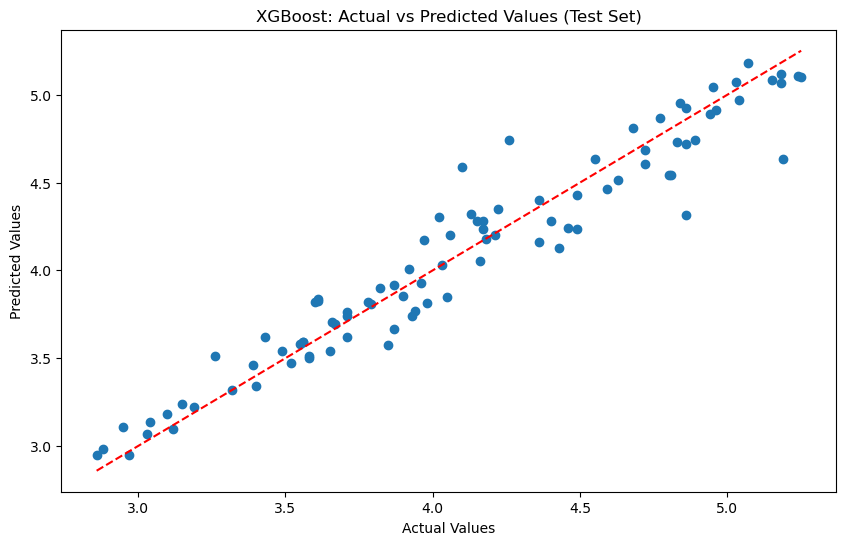

In [72]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Instantiate an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16816528515460774
RAE: 0.23126118866837544
MAE: 0.12598270198573241
R2: 0.9324875821775346


### Xgboost
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error on Validation Set for XGBoost: 0.03
Mean Squared Error on Test Set for XGBoost: 0.04


Text(0, 0.5, 'Predicted Values')

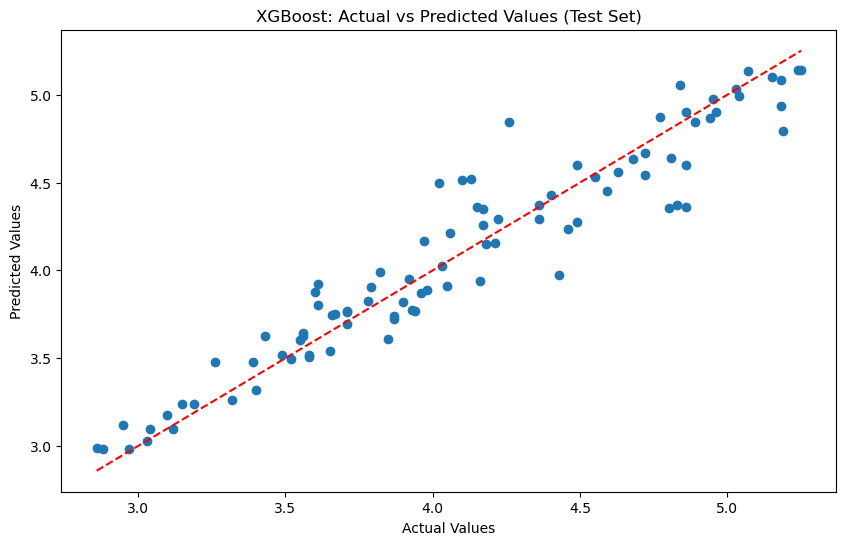

In [74]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [75]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1878397351232907
RAE: 0.2542930104381893
MAE: 0.13852960254835048
R2: 0.9157662956937201


### Xgboost
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.04
Mean Squared Error on Test Set for XGBoost: 0.05


Text(0, 0.5, 'Predicted Values')

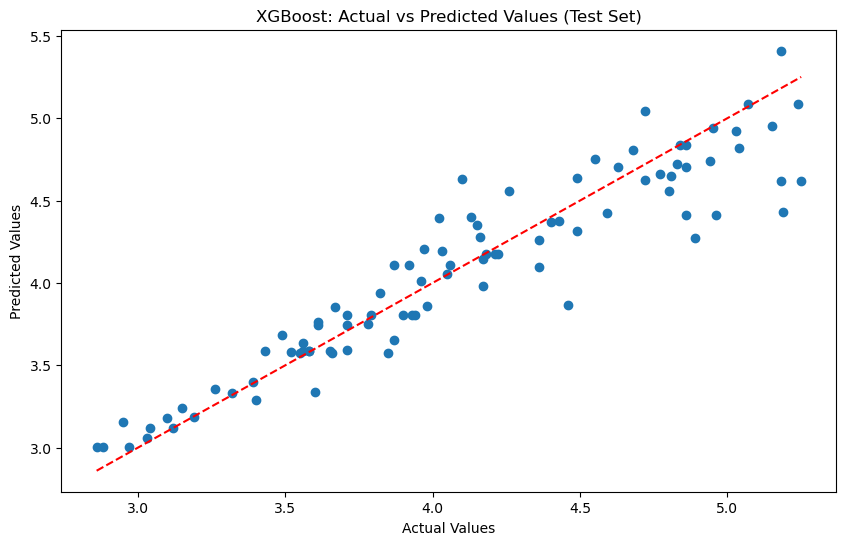

In [76]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [77]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22475815056405776
RAE: 0.2938326079887291
MAE: 0.1600693402083024
R2: 0.8794015113581901


### Xgboost
### Model 5: Three input features: Temp min and max, wind speed

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.04
Mean Squared Error on Test Set for XGBoost: 0.04


Text(0, 0.5, 'Predicted Values')

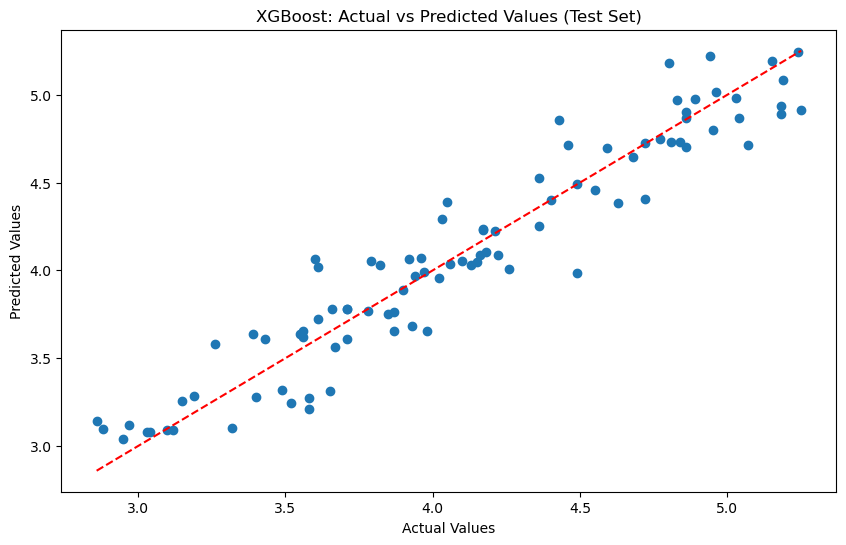

In [78]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [79]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19543325436286837
RAE: 0.2807526035373038
MAE: 0.1529438285205675
R2: 0.9088182562161168


### SVR
### Model 1: All input features

Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.00
Mean Squared Error on Test Set for SVR: 0.00


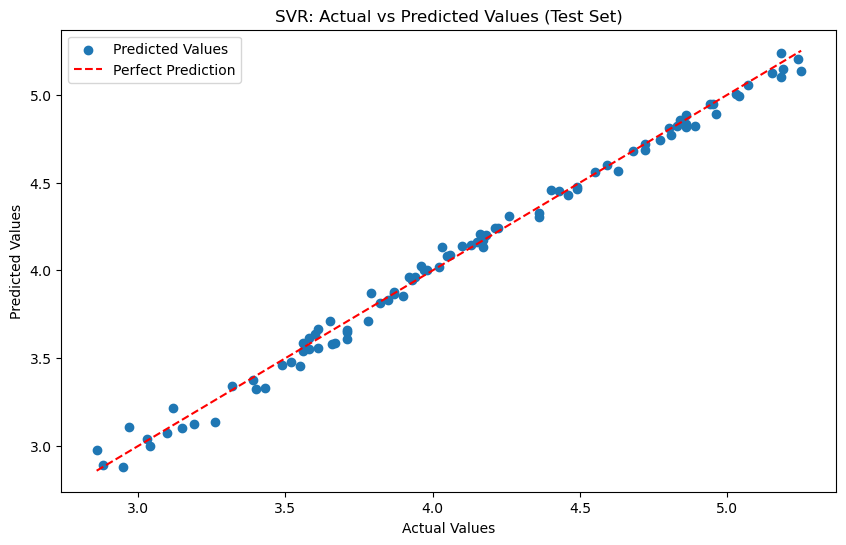

In [80]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.052103788503278334
RAE: 0.07670332503699775
MAE: 0.04178518754094899
R2: 0.993518887349126


### SVR
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


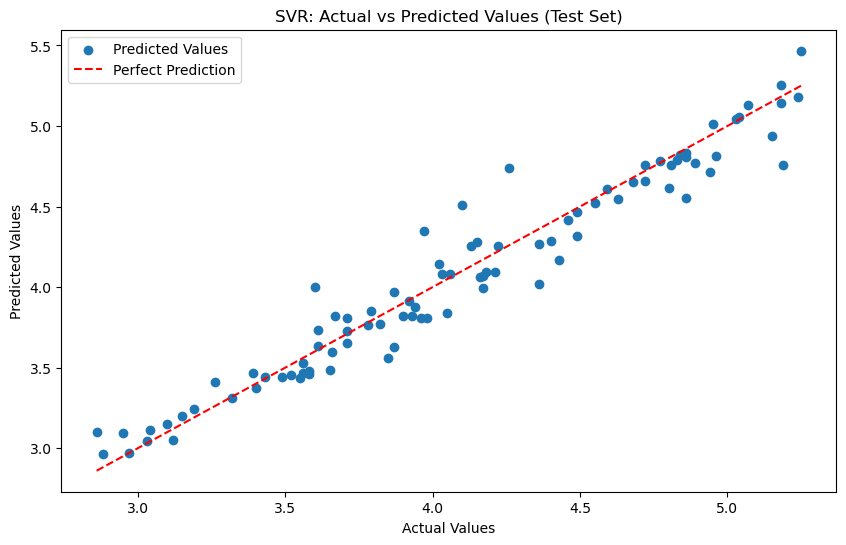

In [82]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [83]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1526739198592587
RAE: 0.20565013926705045
MAE: 0.11203073182226579
R2: 0.9443531381435049


### SVR
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.03


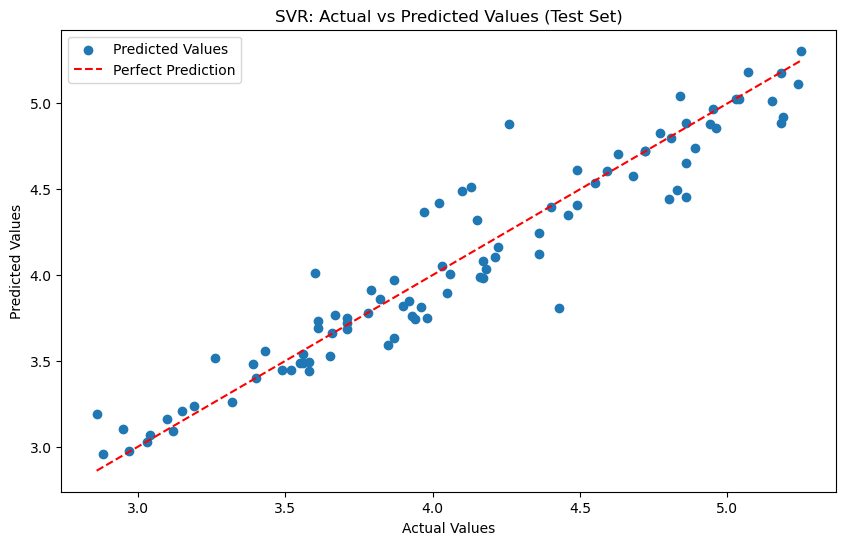

In [84]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.18669900406017723
RAE: 0.24296992993445746
MAE: 0.132361199259947
R2: 0.9167862741003611


### SVR
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.04
Mean Squared Error on Test Set for SVR: 0.04


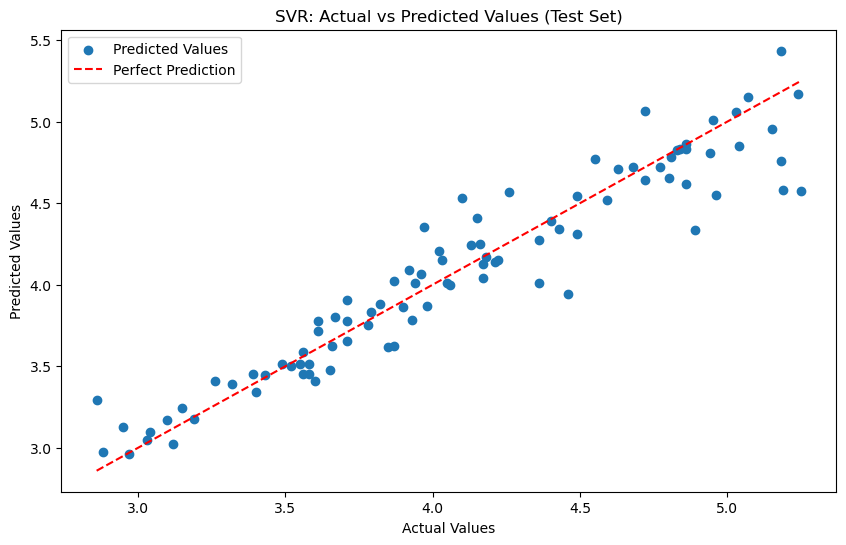

In [86]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.20023461389932848
RAE: 0.2587043183883807
MAE: 0.14093272301165133
R2: 0.9042829566666712


### SVR
### Model 5: Three input features: Temp min and max, Wind speed

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.03
Mean Squared Error on Test Set for SVR: 0.03


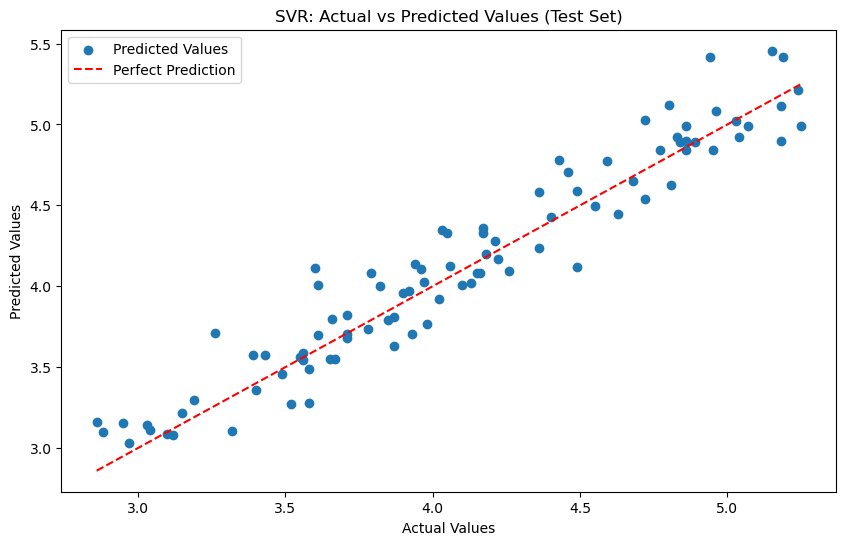

In [88]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [89]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1857427438808805
RAE: 0.26718277673384333
MAE: 0.14555147939349525
R2: 0.9176365216577875
